Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline
from   pylab import rcParams

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import statsmodels.tools.eval_measures as      em
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display


import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-350c18349732>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime



# 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df=pd.read_csv("C:/Users/Zianna/OneDrive/Desktop/PROJECTS- DSBA/Time Series Forecasting/Sparkling.csv")

In [3]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [5]:
 print("The number of rows: ",df.shape[0], "\n""The number of columns: ",df.shape[1])

The number of rows:  187 
The number of columns:  2


In [6]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [7]:
date = pd.date_range(start='1/1/1980', end='31/8/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=188, freq='M')

In [8]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [9]:
df.set_index('Time_Stamp',inplace=True)
df.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [10]:
df.drop(labels='YearMonth',axis=1,inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [11]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

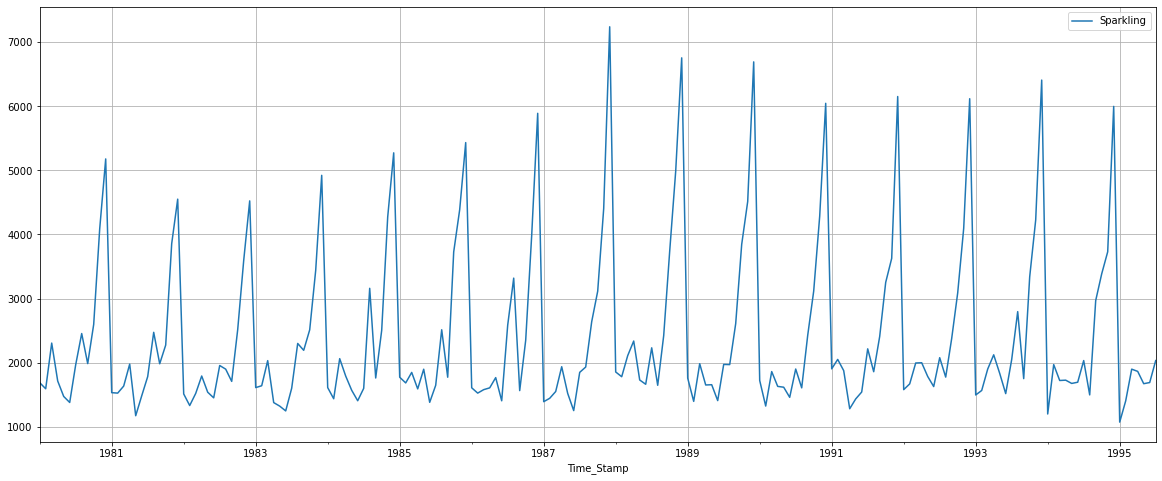

In [12]:
df.plot()
plt.grid();

We can see that there was a slight upward trend in the year 1988 with a seasonal pattern associated as well.

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [13]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

The basic measures of descriptive statistics tell us how the Sparkling wine sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

Plotting a boxplot to understand the spread of Sparkling wine sale across different years and within different months across years.

YEARLY BOXPLOT

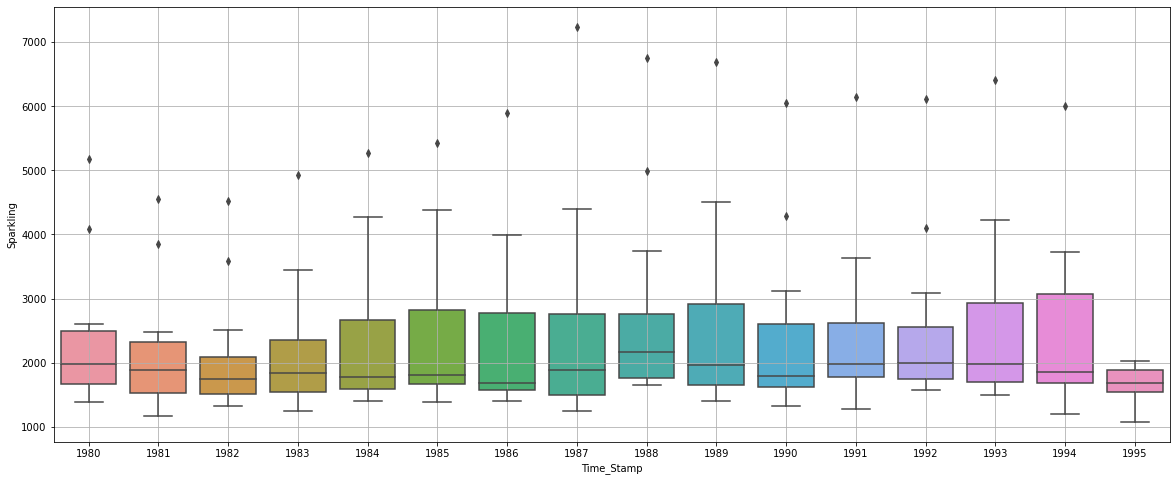

In [14]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

The yearly boxplots shows us how the sale has increased and decresed over the past few years. The highest number of sales being recorded in the year 1989

MONTHLY BOXPLOT

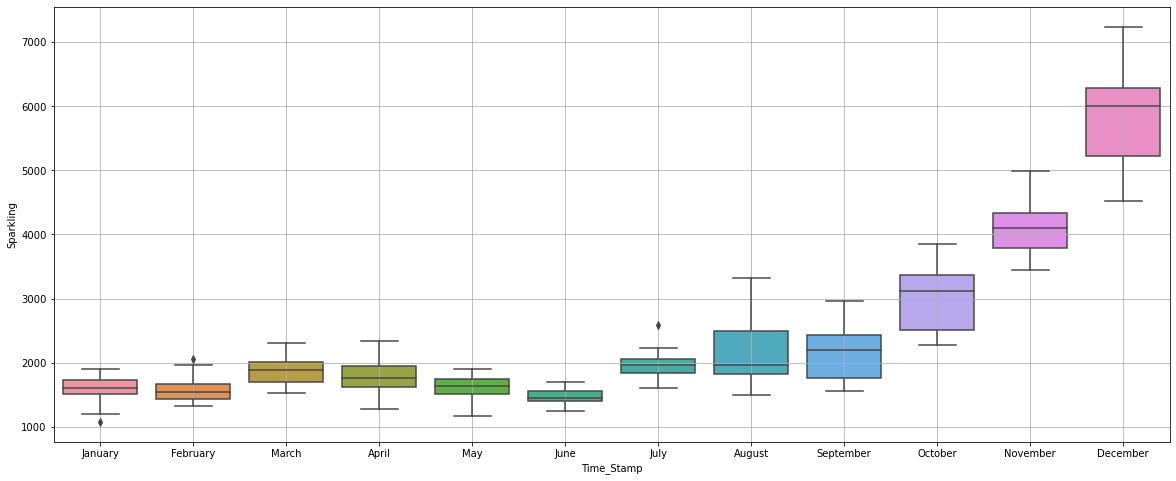

In [15]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

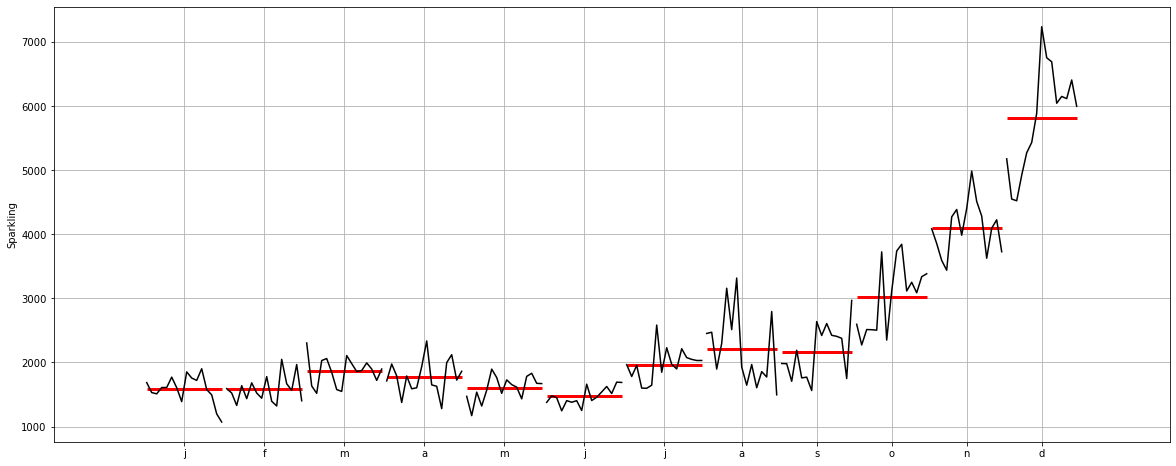

In [16]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df,ylabel='Sparkling')
plt.grid();

In [17]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

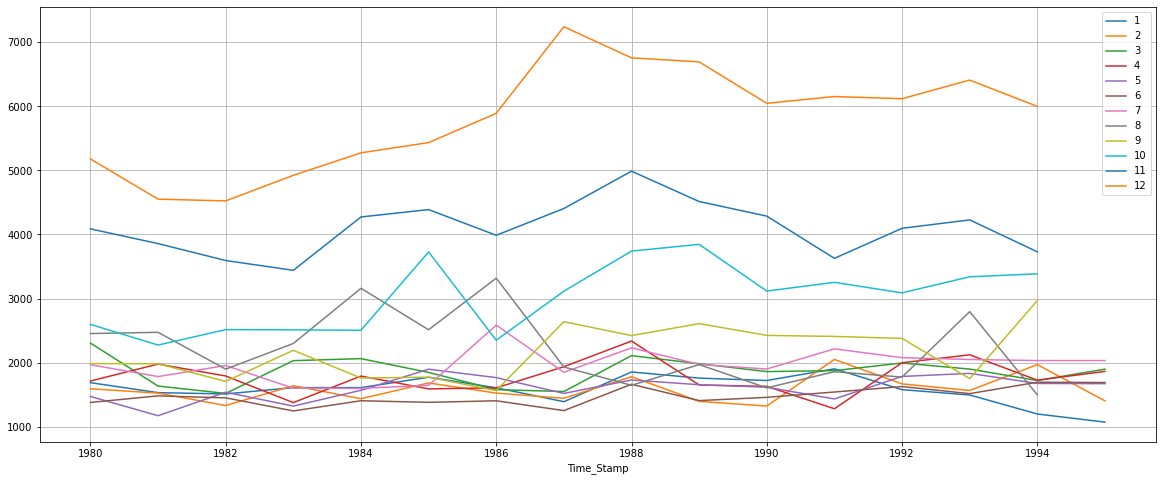

In [18]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

From the graph it can be concluded that December has the highest sale of Sparkling wine.


Plotting the Empirical Cumulative Distribution.

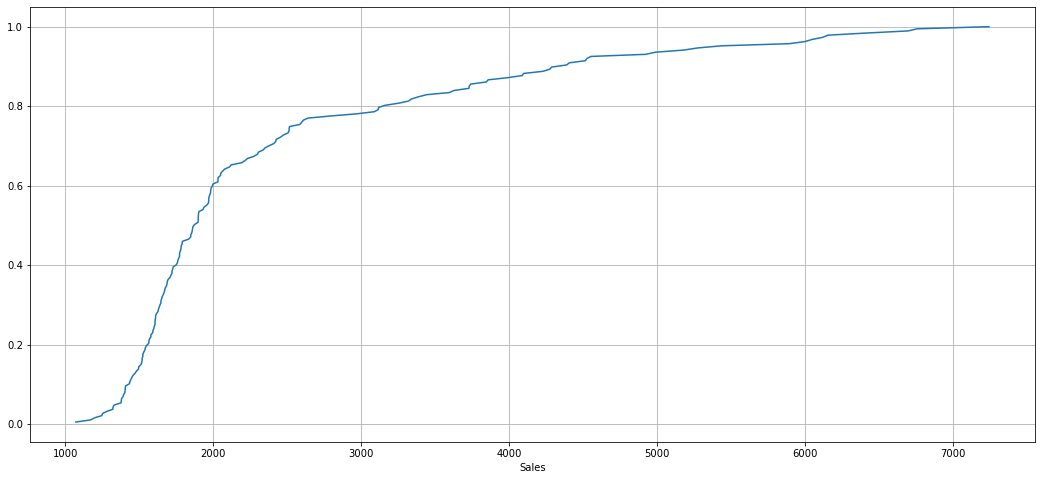

In [19]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

Plotting the average Sparkling Sales per month and the month on month percentage change of Sparkling Sales.

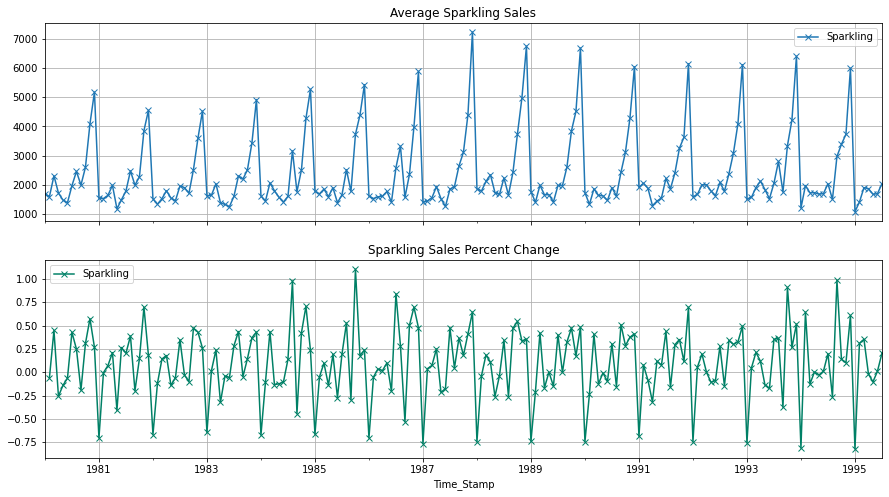

In [20]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='x',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='x',colormap="summer",title="Sparkling Sales Percent Change",grid=True)

The above two graphs tells us the Average 'Sparkling' Sales and the Percentage change of 'Sparkling' Sales with respect to the time.

# DECOMPOSITION

Decomposing the Time Series and plotting the different components.

ADDITIVE DECOMPOSITION

In [21]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

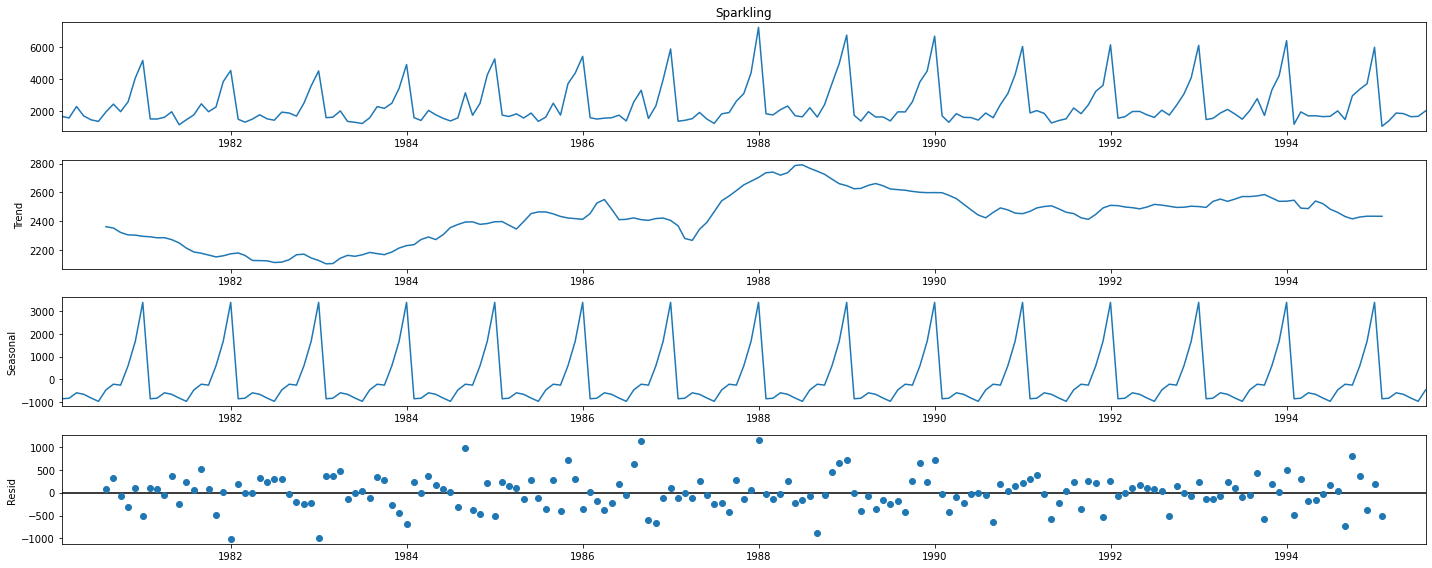

In [22]:
decomposition = seasonal_decompose(df["Sparkling"],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

MULTIPLICATIVE DECOMPOSITION

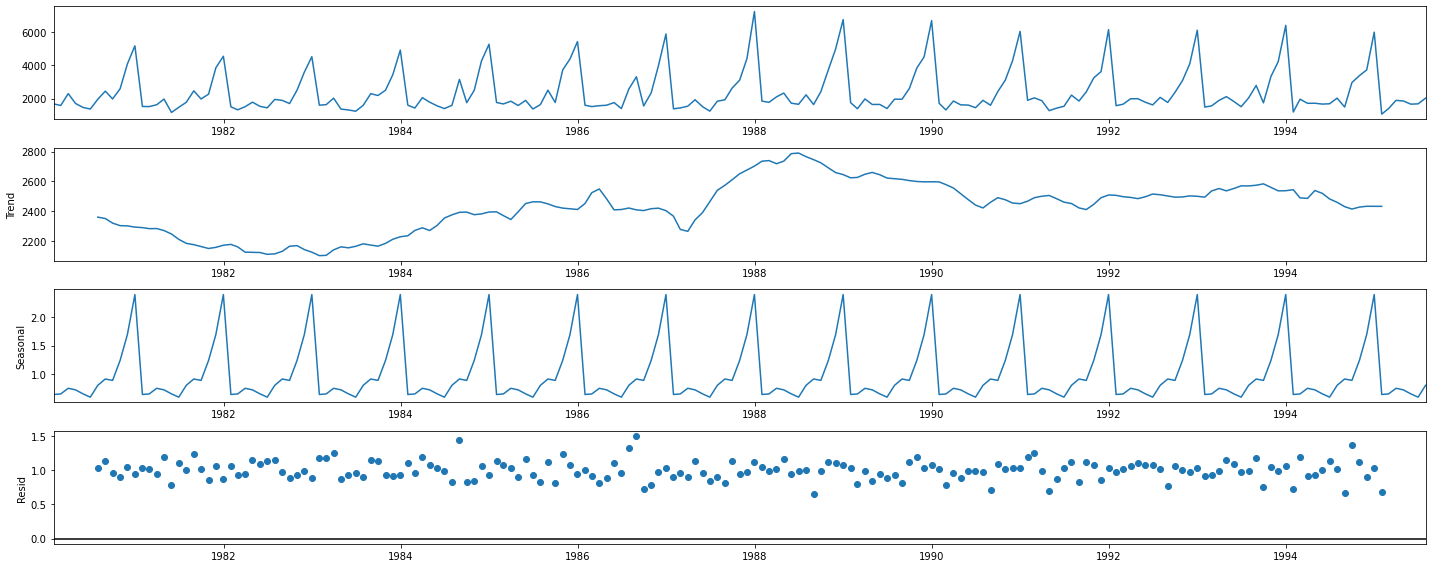

In [24]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

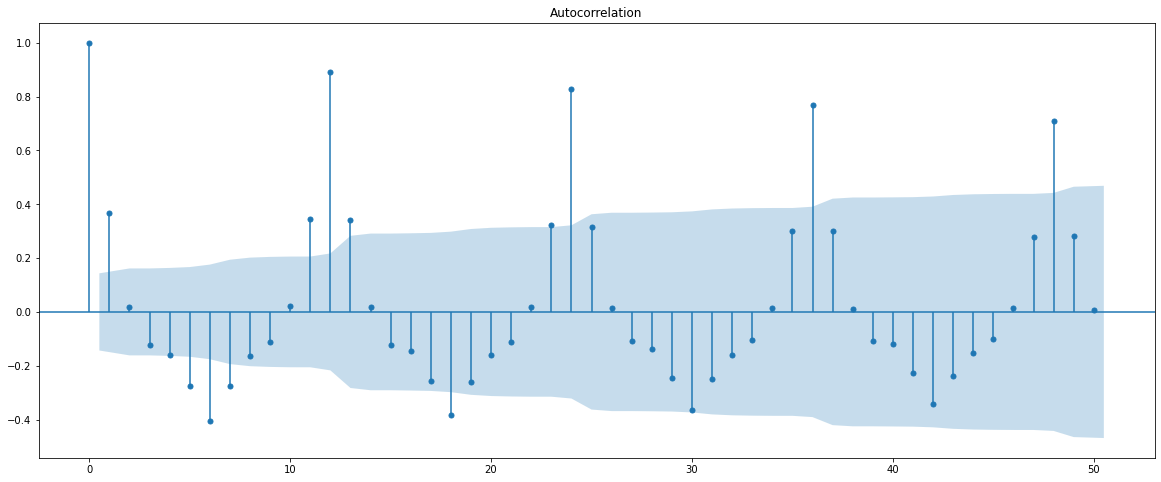

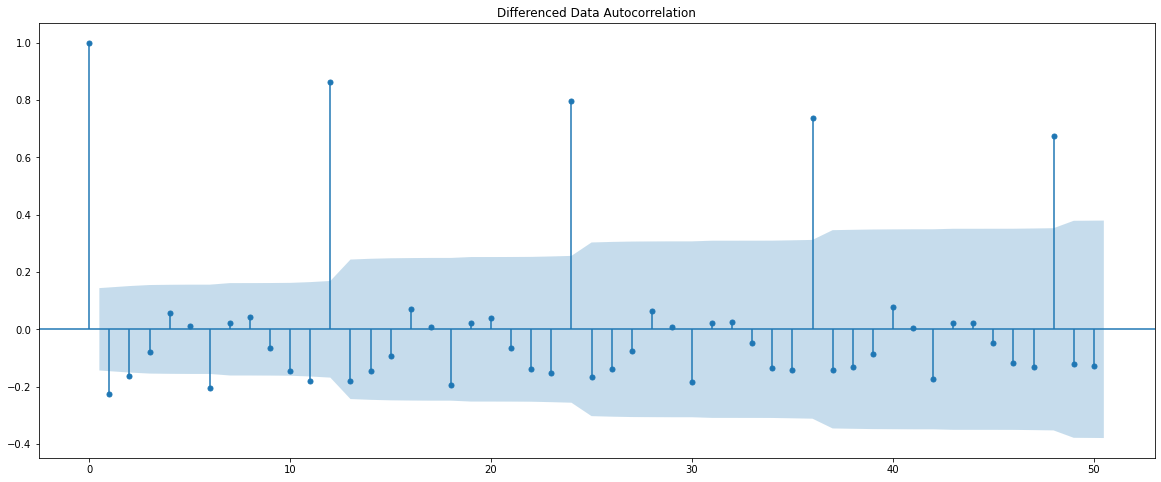

In [26]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

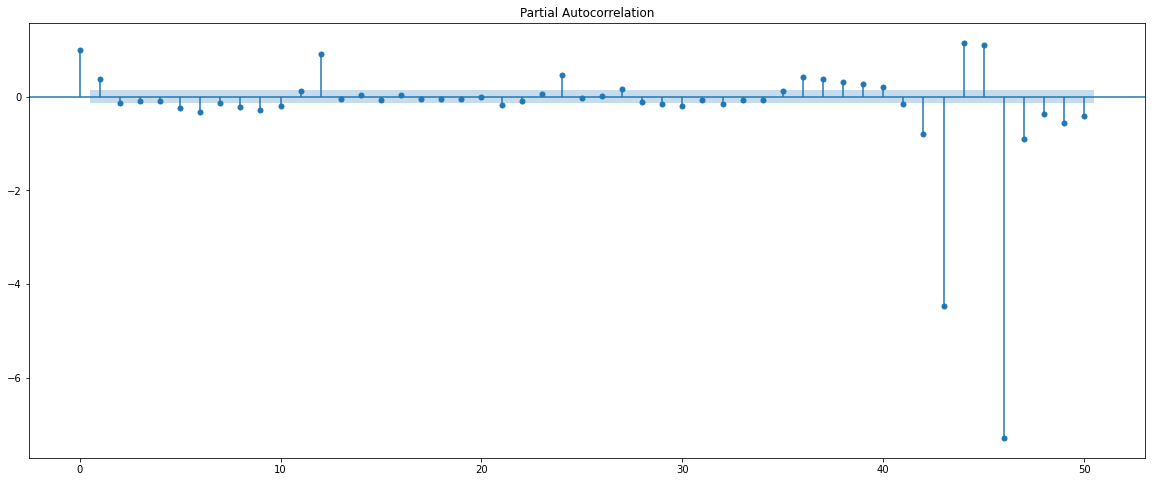

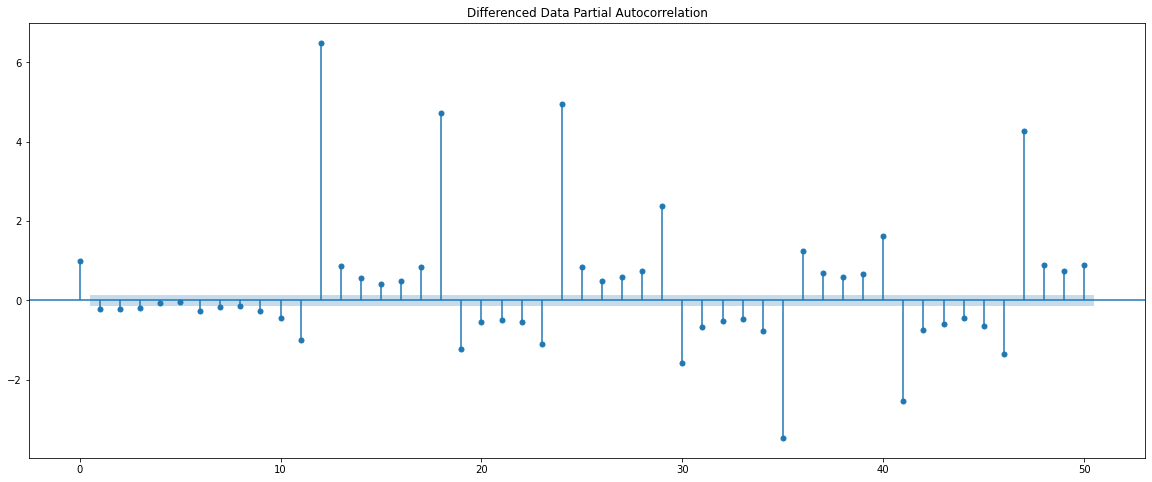

In [27]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data

## 3. Split the data into training and test. The test data should start in 1991.

Splitting the data into train and test and plotting the training and test data.
Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [28]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [29]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [30]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [31]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Checking for stationarity of the Training Data Time Series.

In [32]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

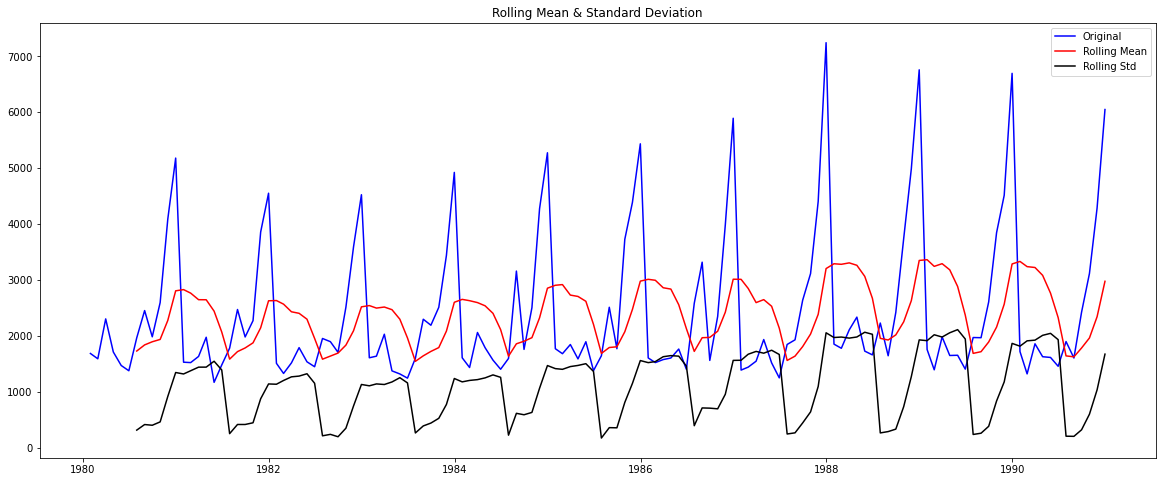

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [33]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at  𝛼  = 0.05.

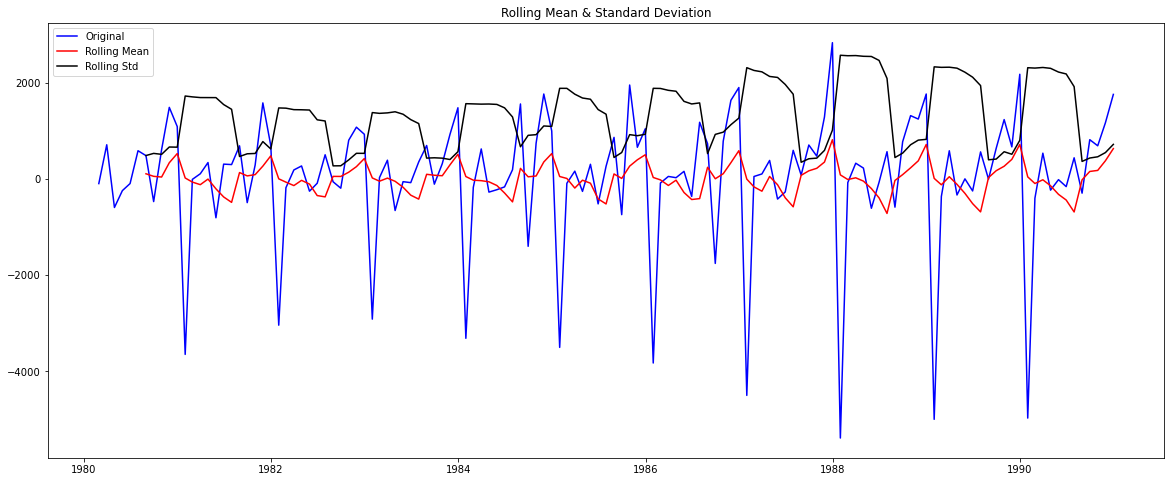

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [34]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

#### SIMPLE EXPONENTIAL SMOOTHING MODEL

SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value

In [36]:
SES_train = train.copy()
SES_test = test.copy()

In [37]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [38]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [39]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07029459943040381,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.1004162520212,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be at 0.07.

In [40]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    2804.687529
1991-02-28    2804.687529
1991-03-31    2804.687529
1991-04-30    2804.687529
1991-05-31    2804.687529
1991-06-30    2804.687529
1991-07-31    2804.687529
1991-08-31    2804.687529
1991-09-30    2804.687529
1991-10-31    2804.687529
1991-11-30    2804.687529
1991-12-31    2804.687529
1992-01-31    2804.687529
1992-02-29    2804.687529
1992-03-31    2804.687529
1992-04-30    2804.687529
1992-05-31    2804.687529
1992-06-30    2804.687529
1992-07-31    2804.687529
1992-08-31    2804.687529
1992-09-30    2804.687529
1992-10-31    2804.687529
1992-11-30    2804.687529
1992-12-31    2804.687529
1993-01-31    2804.687529
1993-02-28    2804.687529
1993-03-31    2804.687529
1993-04-30    2804.687529
1993-05-31    2804.687529
1993-06-30    2804.687529
1993-07-31    2804.687529
1993-08-31    2804.687529
1993-09-30    2804.687529
1993-10-31    2804.687529
1993-11-30    2804.687529
1993-12-31    2804.687529
1994-01-31    2804.687529
1994-02-28    2804.687529
1994-03-31  

In [41]:
rcParams['figure.figsize'] = 20,8

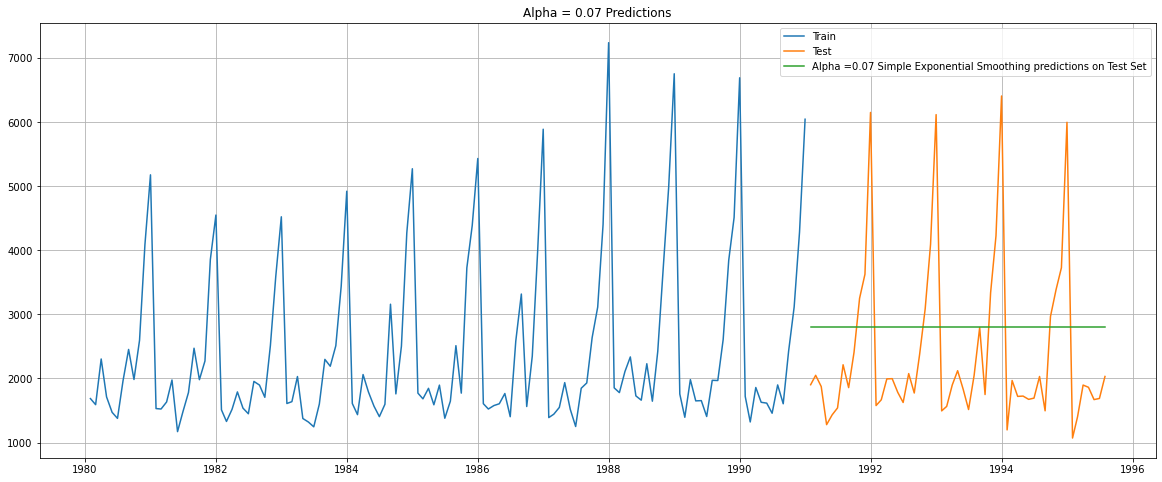

In [42]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07 Predictions');

In [43]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [44]:
print('Simple Exponential Smoothing RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('Simple Exponential Smoothing RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

Simple Exponential Smoothing RMSE: 1338.0121443910186
Simple Exponential Smoothing RMSE (calculated using statsmodels): 1338.0121443910189


In [45]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha= 0.07, SES'])
resultsDf

Test RMSE
Alpha= 0.07, SES  1338.012144

#### DOUBLE EXPONENTIAL SMOOTHING

In [46]:
DES_train = train.copy()
DES_test = test.copy()

In [47]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6638769092832238, 'smoothing_trend': 9.966251357628782e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.5681711003654, 'initial_trend': 29.020225552837097, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [48]:
print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6638769092832238, 'smoothing_trend': 9.966251357628782e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.5681711003654, 'initial_trend': 29.020225552837097, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [49]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    5330.501799
1991-02-28    5359.520204
1991-03-31    5388.538609
1991-04-30    5417.557013
1991-05-31    5446.575418
1991-06-30    5475.593823
1991-07-31    5504.612228
1991-08-31    5533.630633
1991-09-30    5562.649038
1991-10-31    5591.667443
1991-11-30    5620.685847
1991-12-31    5649.704252
1992-01-31    5678.722657
1992-02-29    5707.741062
1992-03-31    5736.759467
1992-04-30    5765.777872
1992-05-31    5794.796277
1992-06-30    5823.814682
1992-07-31    5852.833086
1992-08-31    5881.851491
1992-09-30    5910.869896
1992-10-31    5939.888301
1992-11-30    5968.906706
1992-12-31    5997.925111
1993-01-31    6026.943516
1993-02-28    6055.961920
1993-03-31    6084.980325
1993-04-30    6113.998730
1993-05-31    6143.017135
1993-06-30    6172.035540
1993-07-31    6201.053945
1993-08-31    6230.072350
1993-09-30    6259.090754
1993-10-31    6288.109159
1993-11-30    6317.127564
1993-12-31    6346.145969
1994-01-31    6375.164374
1994-02-28    6404.182779
1994-03-31  

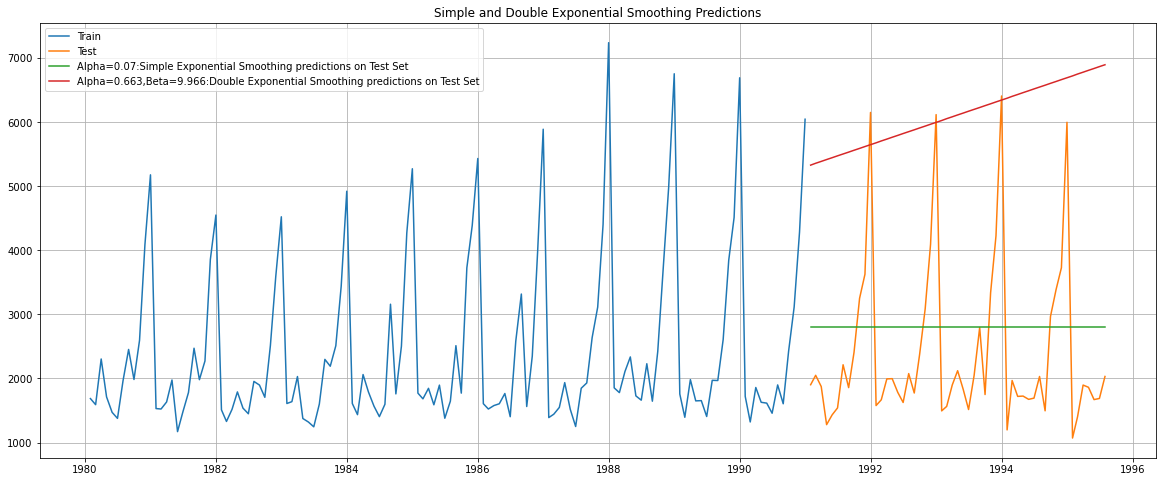

In [50]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.663,Beta=9.966:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [51]:
print('Double Exponential Smoothing RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

Double Exponential Smoothing RMSE: 3949.993290409098


In [52]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha= 0.663, Beta= 9.966, DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                1338.012144
Alpha= 0.663, Beta= 9.966, DES  3949.993290

Inference


Here, we see that the Single Exponential Smoothing has actually done well when compared to the Double Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model was unable to pick up the trend component available in the data.


### TRIPLE EXPONENTIAL SMOOTHING

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [53]:
TES_train = train.copy()
TES_test = test.copy()

In [54]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10005373820823961, 'smoothing_trend': 0.010034490652580457, 'smoothing_seasonal': 0.5095957543425532, 'damping_trend': nan, 'initial_level': 2364.584774604334, 'initial_trend': -0.016752880078245408, 'initial_seasons': array([-653.82559323, -736.67734144, -368.25456128, -483.63906084,
       -826.15467946, -832.96819741, -386.3751117 ,   91.82676187,
       -261.32455153,  265.38968222, 1580.26233564, 2619.56221896]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [55]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31    1509.969093
1991-02-28    1205.343244
1991-03-31    1702.386113
1991-04-30    1548.514691
1991-05-31    1467.824074
1991-06-30    1287.109239
1991-07-31    1804.027662
1991-08-31    1646.339830
1991-09-30    2326.596637
1991-10-31    3228.612283
1991-11-30    4303.269444
1991-12-31    6460.680111
1992-01-31    1505.580741
1992-02-29    1200.954892
1992-03-31    1697.997760
1992-04-30    1544.126339
1992-05-31    1463.435722
1992-06-30    1282.720887
1992-07-31    1799.639310
1992-08-31    1641.951478
1992-09-30    2322.208285
1992-10-31    3224.223931
1992-11-30    4298.881092
1992-12-31    6456.291759
1993-01-31    1501.192388
1993-02-28    1196.566540
1993-03-31    1693.609408
1993-04-30    1539.737987
1993-05-31    1459.047370
1993-06-30    1278.332535
1993-07-31    1795.250957
1993-08-31    1637.563125
1993-09-30    2317.819933
1993-10-31    3219.835579
1993-11-30    4294.492739
1993-12-31    6451.903407
1994-01-31    1496.804036
1994-02-28    1192.178188
1994-03-31  

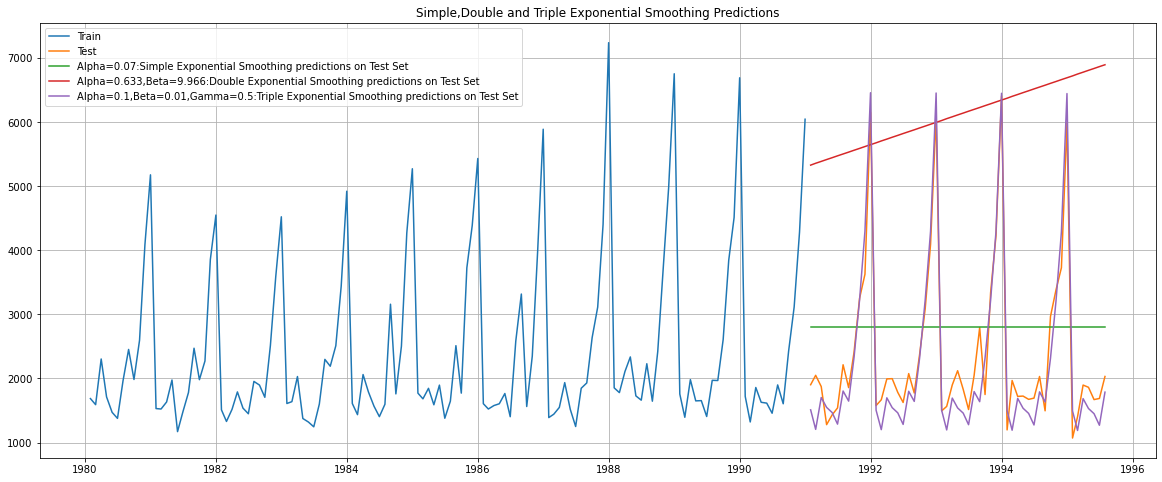

In [56]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.633,Beta=9.966:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.1,Beta=0.01,Gamma=0.5:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well as the trend.

In [57]:
print('Triple Exponential Smoothing RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

Triple Exponential Smoothing RMSE: 379.6956857387101


In [58]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.1, Beta=0.01, Gamma=0.5, TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.012144
Alpha= 0.663, Beta= 9.966, DES        3949.993290
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.


### LINEAR REGRESSION 

In [59]:
len(df)

187

In [60]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [61]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [62]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [66]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

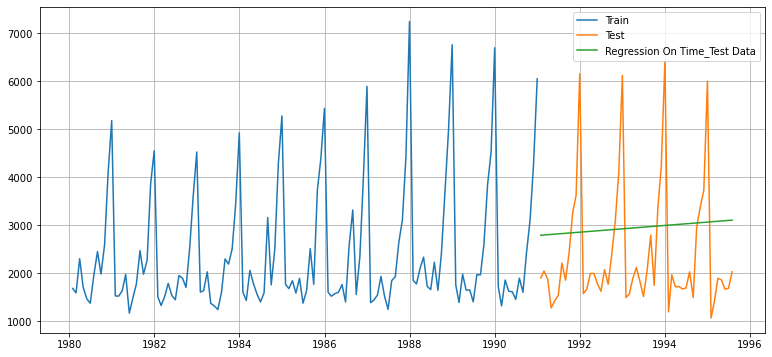

In [67]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [68]:
## Test Data - RMSE

rmse_model1_test = mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [69]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model1_test]}
                           ,index=['Regression'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.012144
Alpha= 0.663, Beta= 9.966, DES        3949.993290
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686
Regression                            1389.135175

### NAIVE APPROACH

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [70]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [71]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

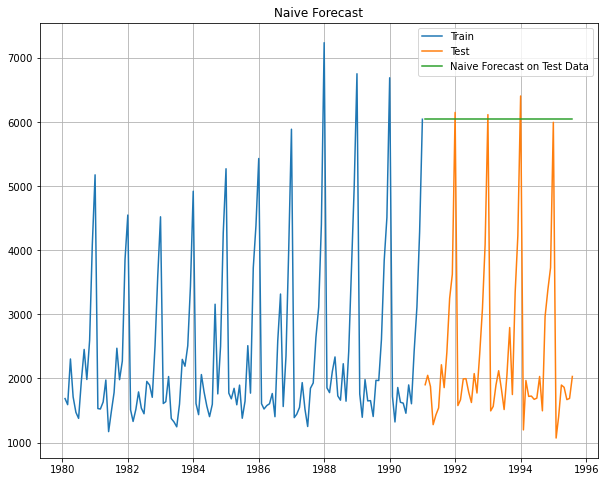

In [72]:
plt.figure(figsize=(10,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [73]:
## Test Data - RMSE

rmse_model2_test = mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [74]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.012144
Alpha= 0.663, Beta= 9.966, DES        3949.993290
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686
Regression                            1389.135175
Naive Model                           3864.279352

### SIMPLE AVERAGE

For this particular simple average method, we will forecast by using the average of the training values.¶

In [75]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [76]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

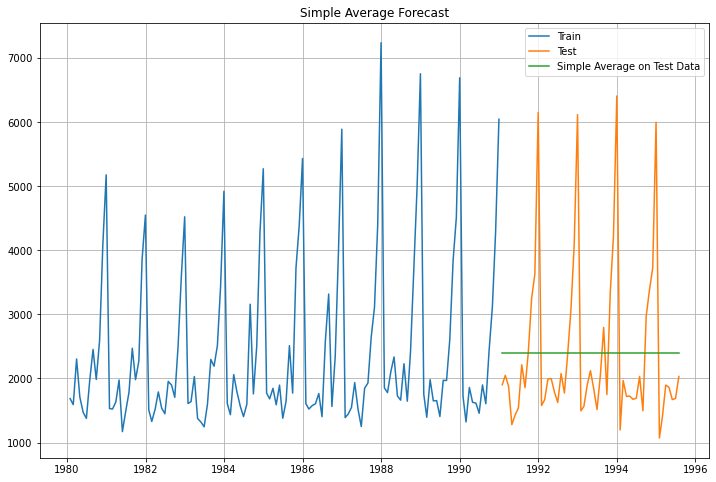

In [77]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [78]:
## Test Data - RMSE 

rmse_model3_test = mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [79]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.012144
Alpha= 0.663, Beta= 9.966, DES        3949.993290
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804

## MOVING AVERAGE

In [80]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [81]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

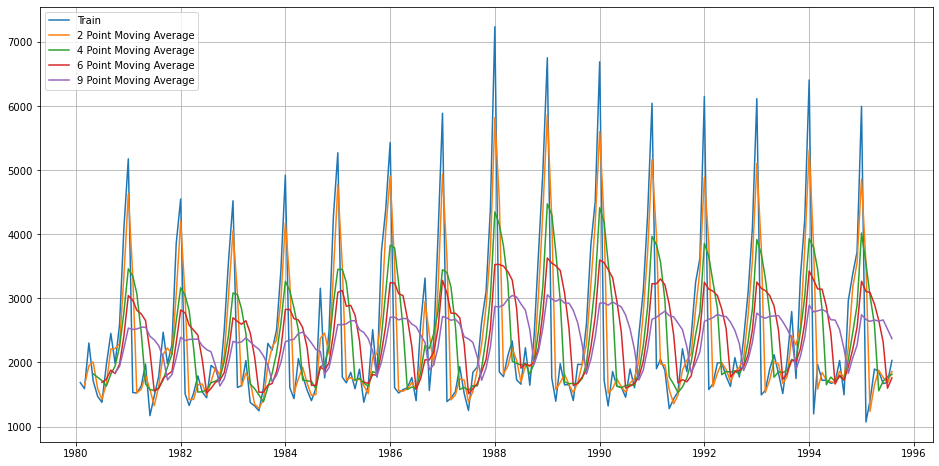

In [82]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [83]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year>=1991]

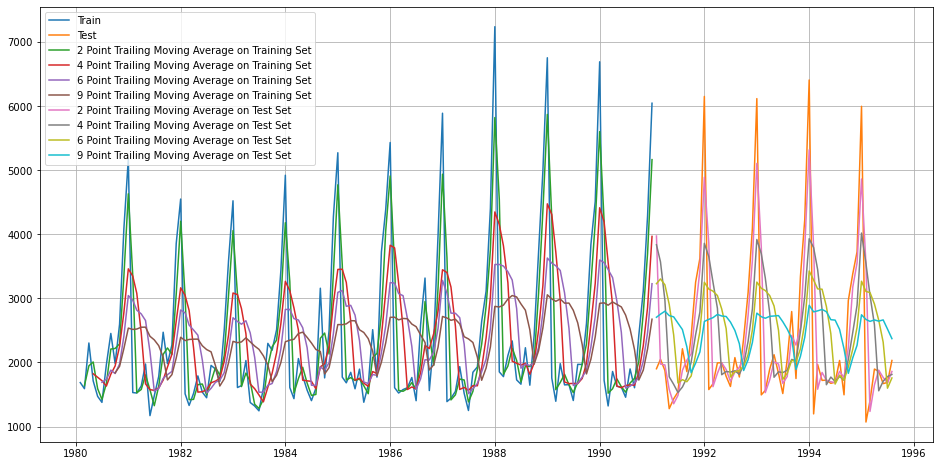

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [85]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [86]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2point Trailing Moving Average','4 point Trailing Moving Average'
                                   ,'6point Trailing Moving Average','9 point Trailing Moving Average'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.012144
Alpha= 0.663, Beta= 9.966, DES        3949.993290
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

H0 : The Time Series has a unit root and is thus non-stationary.

H1 : The Time Series does not have a unit root and is thus stationary.
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

In [87]:
from statsmodels.tsa.stattools import adfuller

In [88]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932035
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [89]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


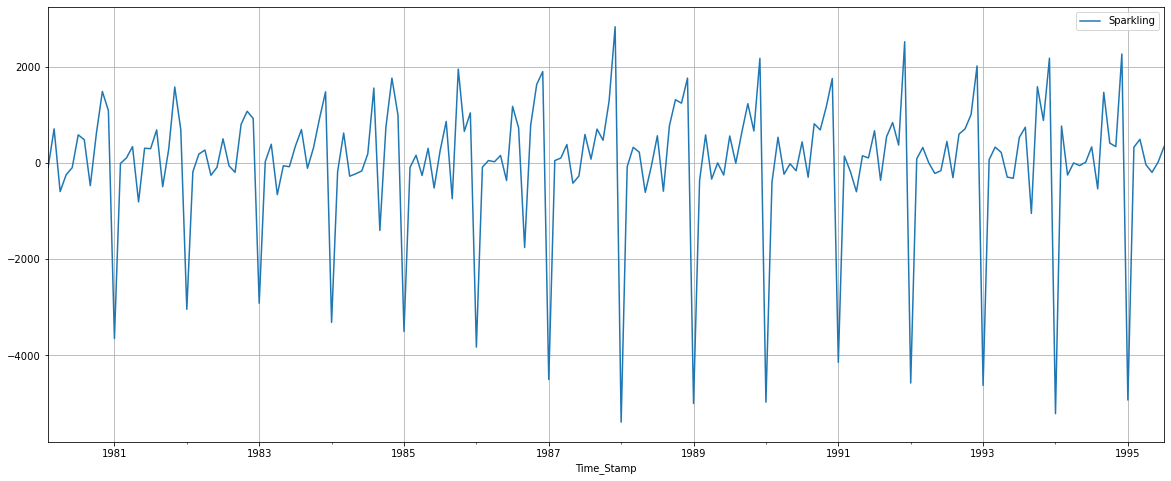

In [90]:
df.diff().dropna().plot(grid=True);

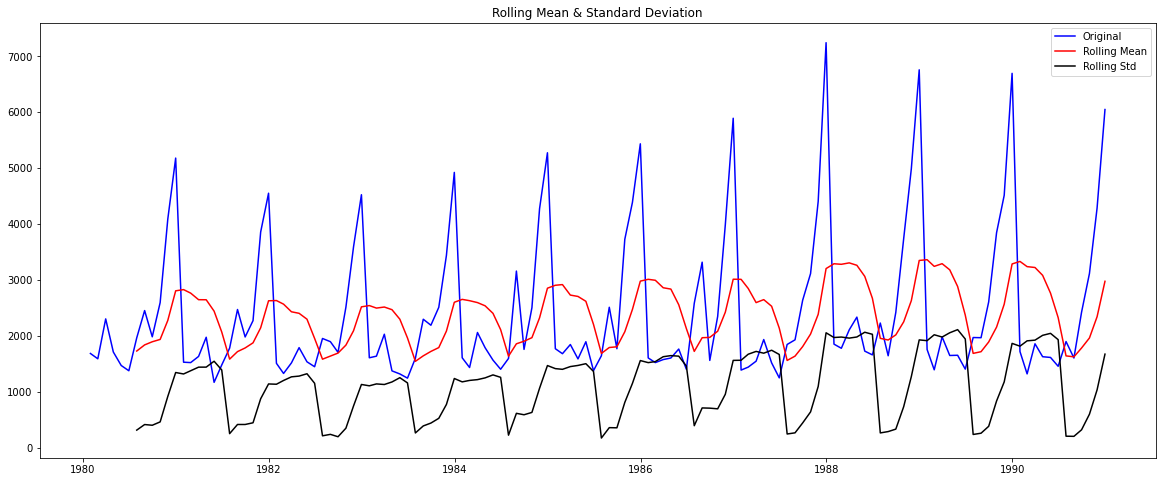

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [91]:
test_stationarity(train['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

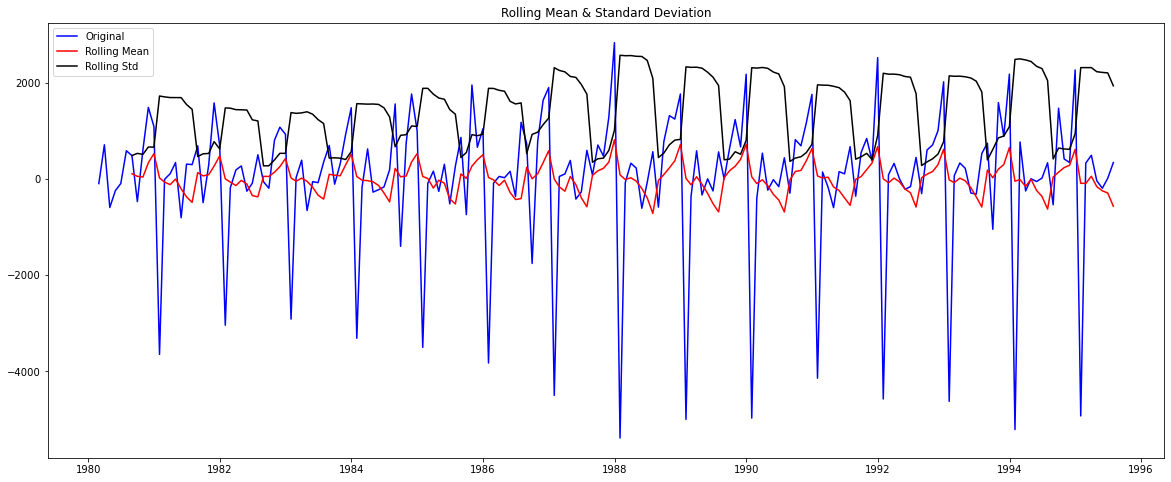

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [92]:
test_stationarity(df['Sparkling'].diff().dropna())

We see that at 𝛼 = 0.05 the Time Series is indeed stationary.

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [93]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [94]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [95]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064368172944
ARIMA(0, 1, 2) - AIC:2232.783097684661
ARIMA(1, 1, 0) - AIC:2268.5280606648653
ARIMA(1, 1, 1) - AIC:2235.0139453510988
ARIMA(1, 1, 2) - AIC:2233.597647119537
ARIMA(2, 1, 0) - AIC:2262.035600095461
ARIMA(2, 1, 1) - AIC:2232.3604898848293
ARIMA(2, 1, 2) - AIC:2210.616429928409


In [96]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.616430
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906437
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [97]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.308
Method:                       css-mle   S.D. of innovations           1012.036
Date:                Sun, 20 Mar 2022   AIC                           2210.616
Time:                        19:39:50   BIC                           2227.868
Sample:                    02-29-1980   HQIC                          2217.626
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5847      0.517     10.803      0.000       4.571       6.598
ar.L1.D.Sparkling     1.2702      0.074     17.052      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

### Predict on the Test Set using this model and evaluate the model.

In [98]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [99]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.9580479969213


In [100]:
## Test Data - RMSE 

rmse_model4_test = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print("For ARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For ARIMA on the Test Data,  RMSE is 1374.958


In [101]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model4_test]},index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.012144
Alpha= 0.663, Beta= 9.966, DES        3949.993290
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1374.958048

## SARIMA

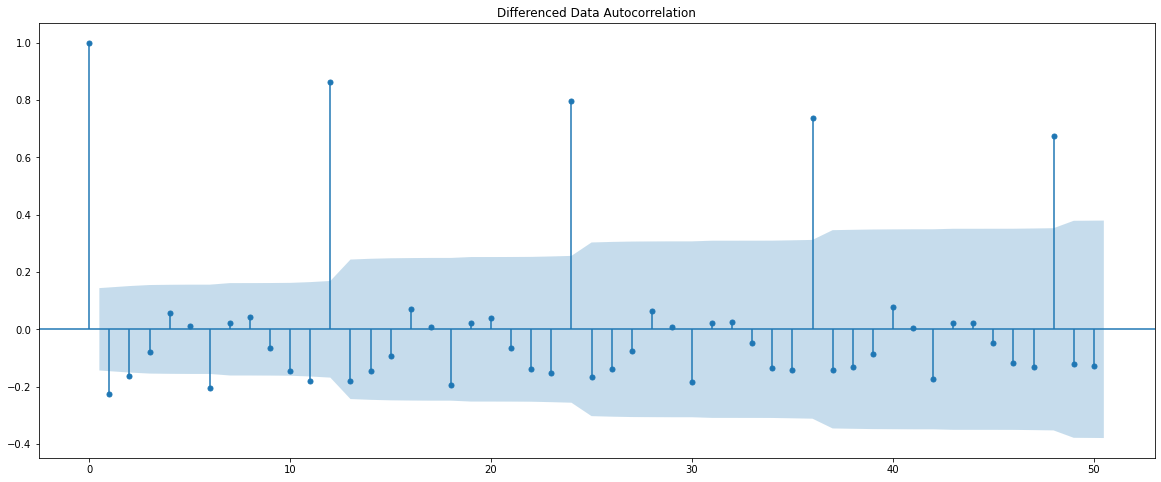

In [102]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [103]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [104]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [105]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076171629
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.635553689071
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984443091
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111440978
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510511
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657544
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339544276
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242878454
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298136749
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274536223
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885104034895
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933620354
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6964513483692
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

In [106]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888803
80  (2, 1, 2)  (2, 0, 2, 6)  1729.178594
53  (1, 1, 2)  (2, 0, 2, 6)  1729.934495
17  (0, 1, 1)  (2, 0, 2, 6)  1741.696451
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379778

In [107]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.944
Date:                           Sun, 20 Mar 2022   AIC                           1727.889
Time:                                   19:40:16   BIC                           1747.164
Sample:                                        0   HQIC                          1735.713
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7851      0.103     -7.655      0.000      -0.986      -0.584
ma.L2         -0.0975      0.112     -0.870

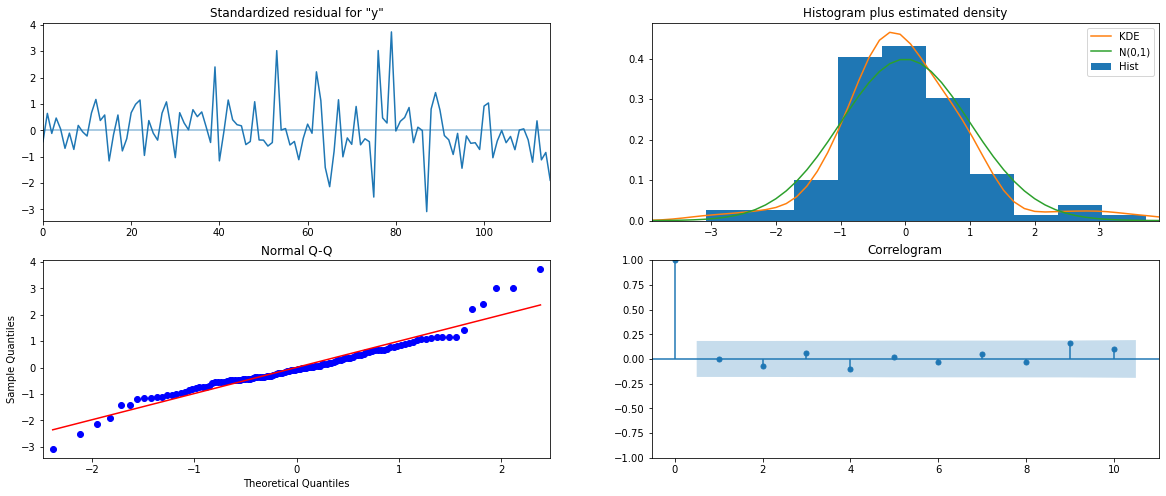

In [108]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model.

In [109]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [110]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1375.580323  384.072914     622.811244    2128.349403
1  1116.607983  392.839126     346.657445    1886.558521
2  1667.556841  395.413558     892.560508    2442.553174
3  1528.328132  397.974441     748.312561    2308.343702
4  1372.199160  400.519004     587.196337    2157.201983

In [111]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

601.3534243749832


In [112]:
rmse_model5_test = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

601.3534243749832


In [113]:
## Test Data - RMSE 

rmse_model5_test = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print("For SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model5_test))

For SARIMA on the Test Data,  RMSE is 601.353


In [114]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model5_test]},index=['SARIMA(0,1,2)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.012144
Alpha= 0.663, Beta= 9.966, DES        3949.993290
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1374.958048
SARIMA(0,1,2)(2,0,2,6)                 601.353424

## Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [115]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [116]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [117]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684553
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640237064
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389308
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735792024
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158613328
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920729
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566726
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572748998
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183803
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193766617
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144566762
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175065
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.224508535863
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683738379118
SARIMA(0, 1, 

In [118]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [119]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 20 Mar 2022   AIC                           1555.584
Time:                                    19:40:51   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

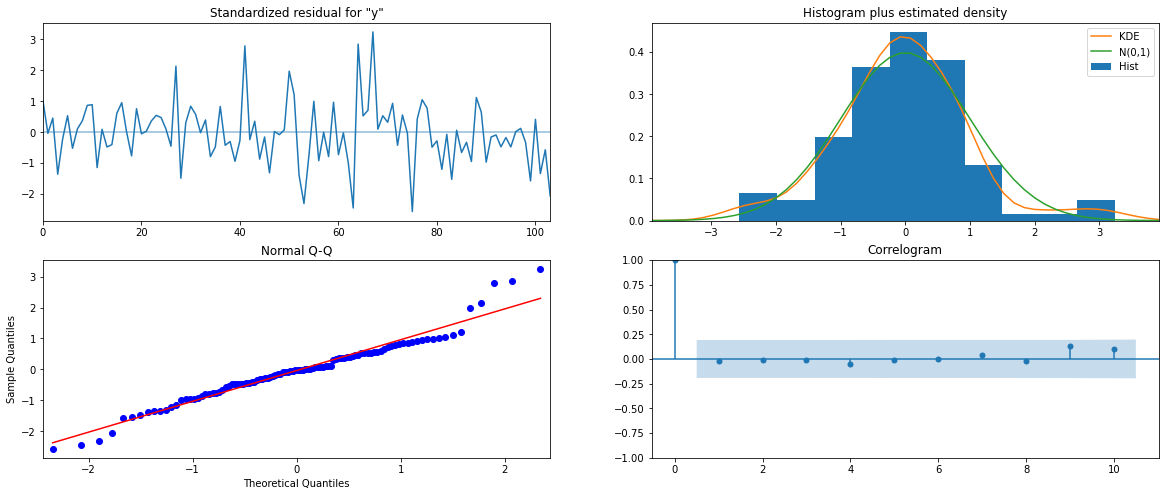

In [120]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

### Predict on the Test Set using this model and evaluate the model.

In [121]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [122]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.410286  388.341287     566.275351    2088.545222
1  1315.147036  402.003217     527.235209    2103.058862
2  1621.610514  401.996827     833.711211    2409.509817
3  1598.899171  407.234059     800.735083    2397.063259
4  1392.717796  407.963724     593.123589    2192.312002

In [123]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.5880339212471


In [124]:
## Test Data - RMSE 

rmse_model5_12_test = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print("For SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model5_12_test))

For SARIMA on the Test Data,  RMSE is 528.588


In [125]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model5_12_test]},index=['SARIMA(1,1,2)(1,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.012144
Alpha= 0.663, Beta= 9.966, DES        3949.993290
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1374.958048
SARIMA(0,1,2)(2,0,2,6)                 601.353424
SARIMA(1,1,2)(1,0,2,12)                528.588034

We see that the RMSE value has only reduced further by a margin when the seasonality parameter was changed to 12, and there is not much difference in the model diagnostics of the two models.

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Let us look at the ACF and the PACF plots once more.

### ARIMA MANUAL

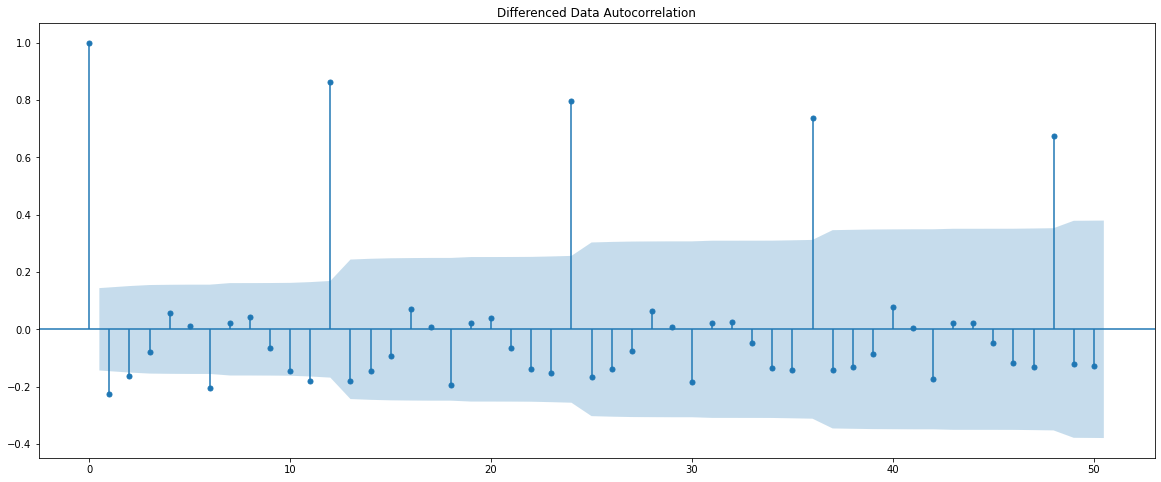

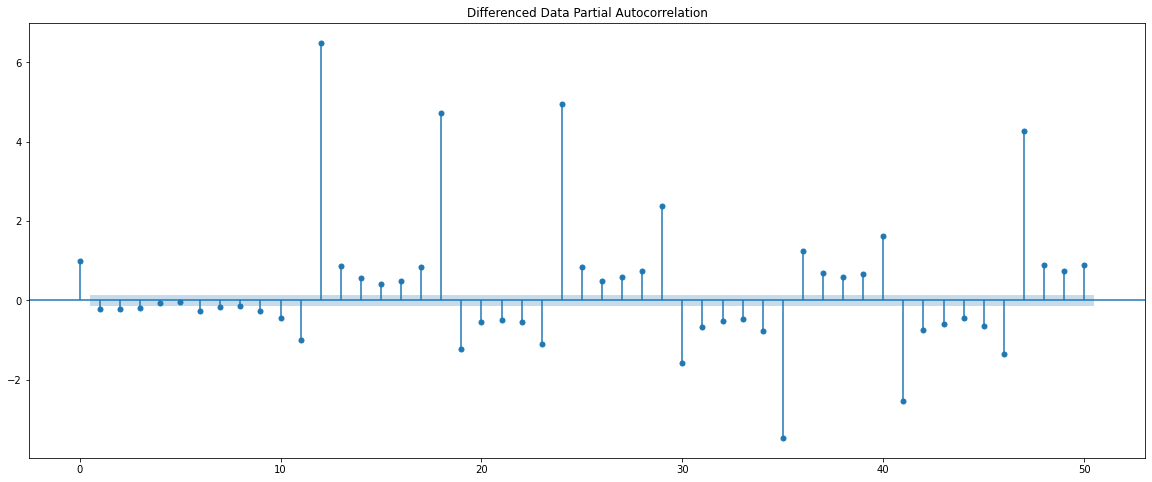

In [126]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
By looking at the above plots, we will take the value of p and q to be 0 and 0 respectively.

In [127]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1112.392
Method:                       css-mle   S.D. of innovations           1159.696
Date:                Sun, 20 Mar 2022   AIC                           2232.783
Time:                        19:40:52   BIC                           2244.284
Sample:                    02-29-1980   HQIC                          2237.456
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2472      3.800      1.644      0.100      -1.201      13.696
ma.L1.D.Sparkling    -0.5555      0.073     -7.583      0.000      -0.699      -0.412
ma.L2.D.Sparkling    -0.

We get a comparatively simpler model by looking at the ACF and the PACF plots.

Predict on the Test Set using this model and evaluate the model.

In [128]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [129]:
## Test Data - RMSE 

rmse_model6_test = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print("For MANUAL ARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))

For MANUAL ARIMA on the Test Data,  RMSE is 1417.502


In [130]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model6_test]},index=['MANUAL ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.012144
Alpha= 0.663, Beta= 9.966, DES        3949.993290
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1374.958048
SARIMA(0,1,2)(2,0,2,6)                 601.353424
SARIMA(1,1,2)(1,0,2,12)                528.588034
MANUAL ARIMA(0,1,2)                   1417.502239

### SARIMA MANUAL

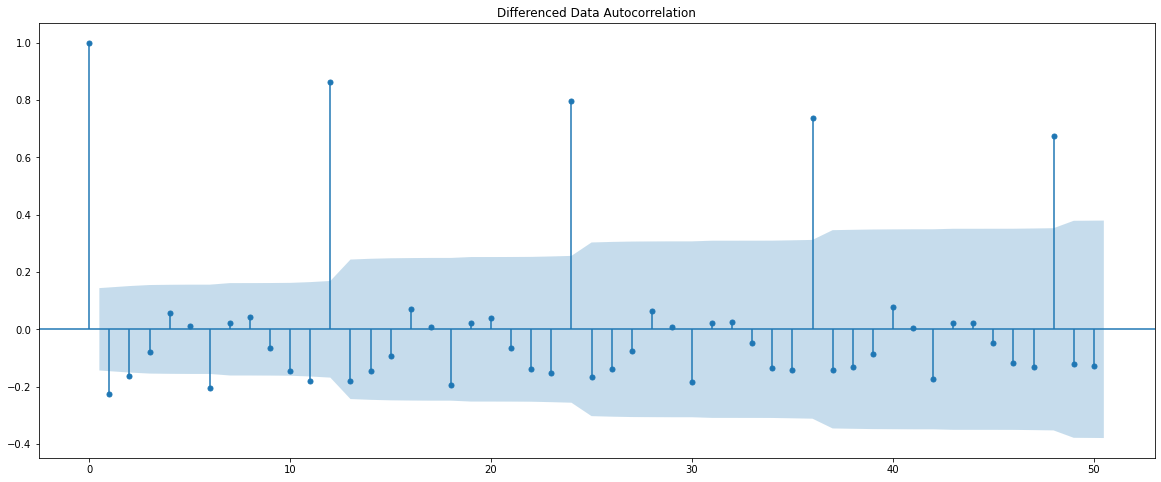

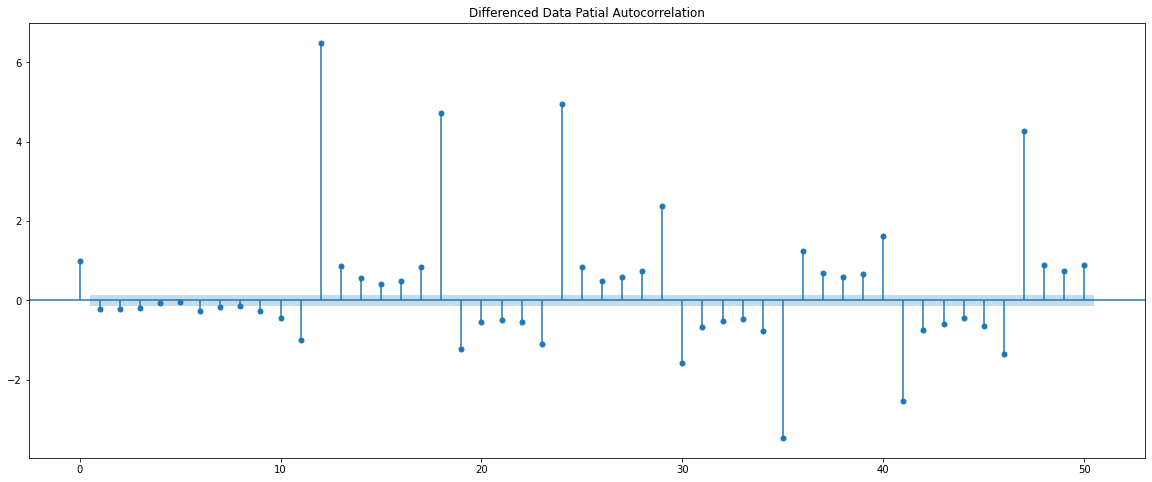

In [131]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

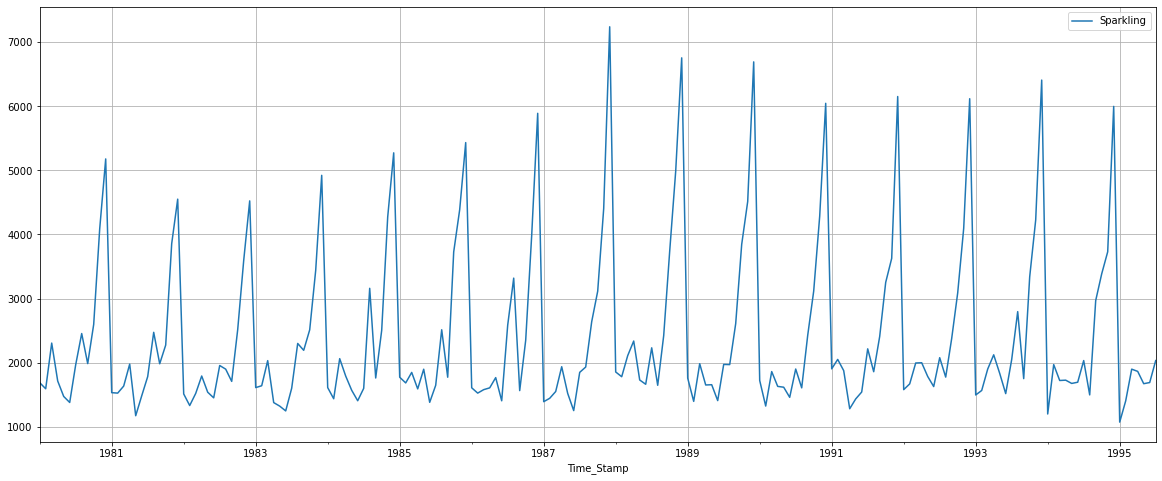

In [132]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

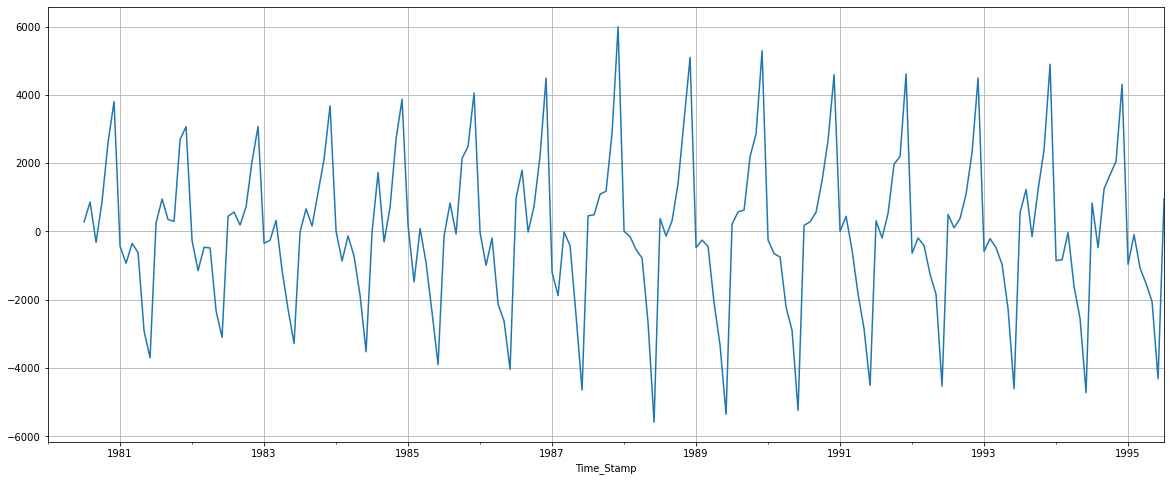

In [133]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

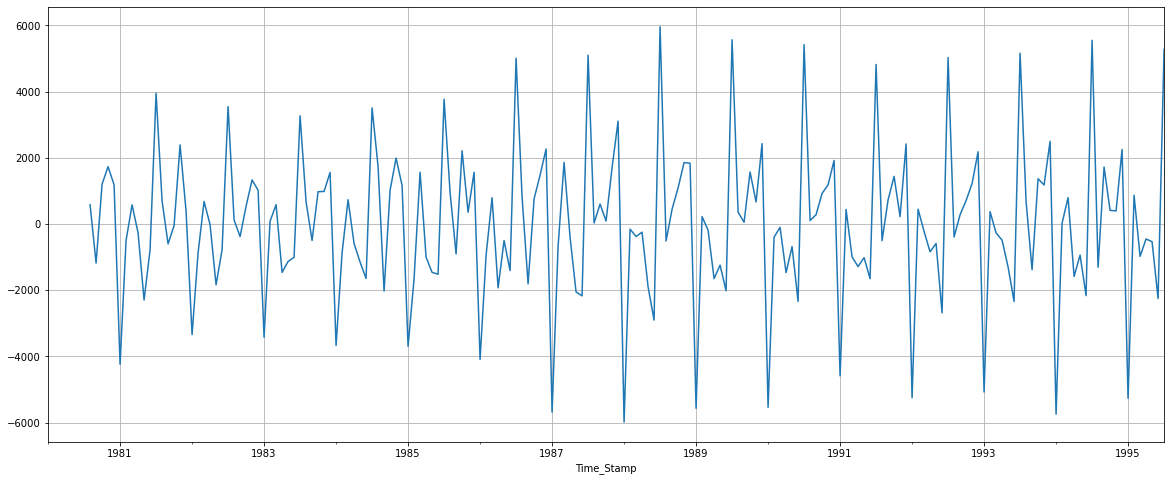

In [134]:
(df['Sparkling'].diff(6)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model

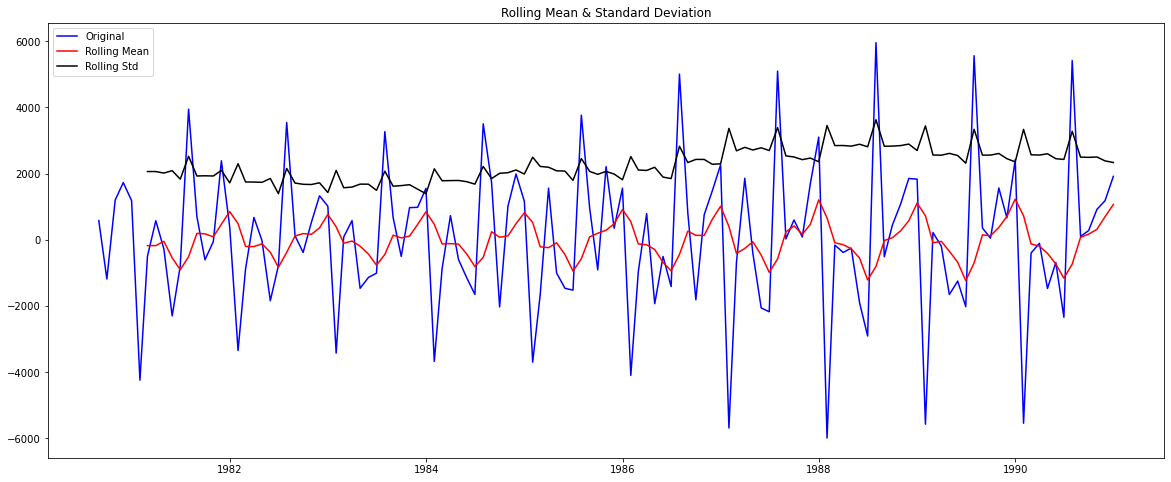

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [135]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

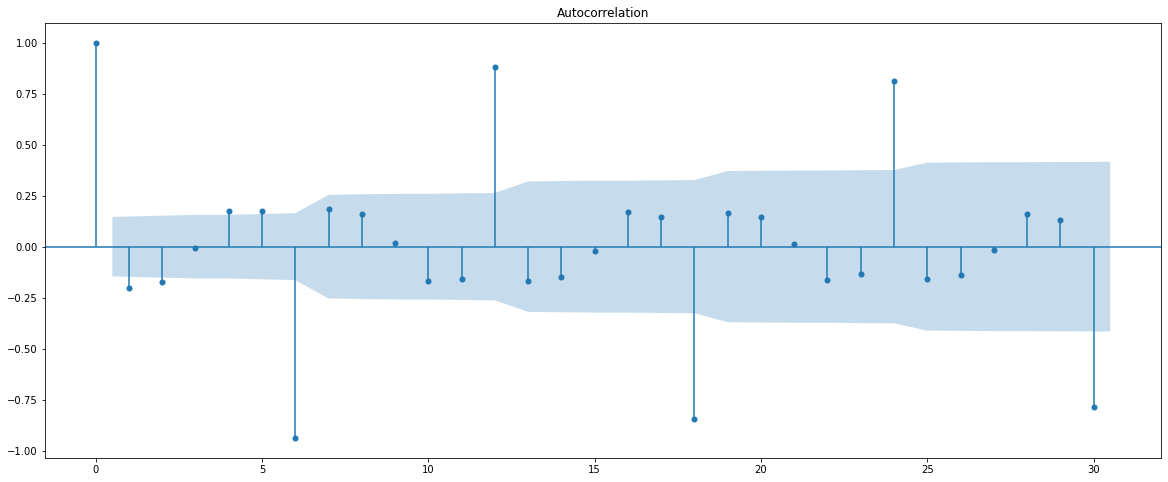

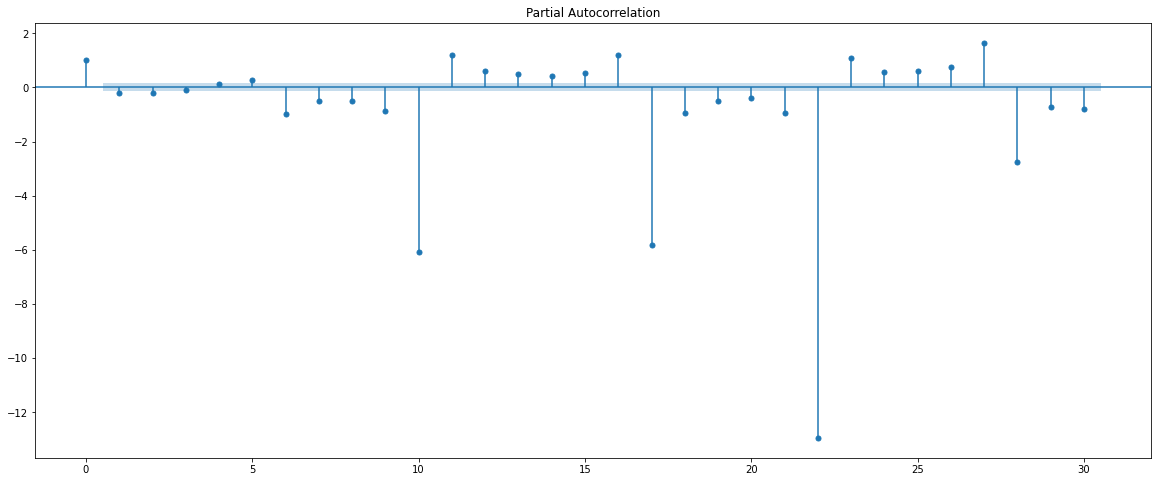

In [136]:
plot_acf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(1) and q(1) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).
By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.



In [137]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.967
Date:                           Sun, 20 Mar 2022   AIC                           1729.934
Time:                                   19:40:58   BIC                           1751.963
Sample:                                        0   HQIC                          1738.877
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0913      1.069      0.085      0.932      -2.005       2.187
ma.L1       -210.0726    4.6e+04     -0.005

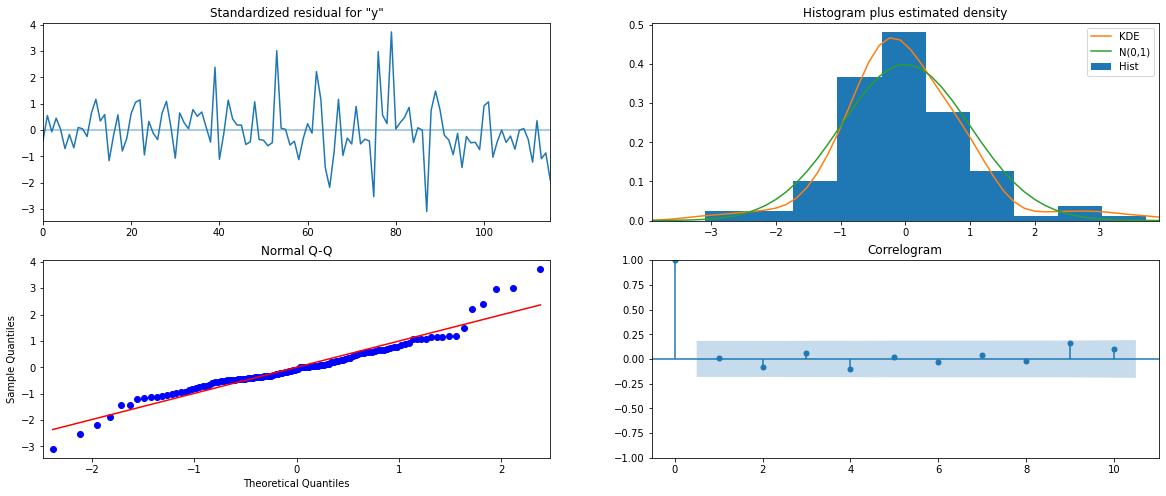

In [138]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.

In [139]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [140]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1379.682850  384.315882     626.437562    2132.928138
1  1105.969477  391.634675     338.379619    1873.559334
2  1657.232781  394.657746     883.717812    2430.747751
3  1522.446267  397.370948     743.613521    2301.279014
4  1369.062235  400.040038     584.998169    2153.126302

In [141]:
rmse_model7_test = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print("For MANUAL SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model7_test))

For MANUAL SARIMA on the Test Data,  RMSE is 607.940


In [142]:
## Test Data - RMSE 

rmse_model7_test = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print("For MANUAL SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model7_test))

For MANUAL SARIMA on the Test Data,  RMSE is 607.940


In [143]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model7_test]},index=['MANUAL SARIMA(1,1,2)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.012144
Alpha= 0.663, Beta= 9.966, DES        3949.993290
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1374.958048
SARIMA(0,1,2)(2,0,2,6)                 601.353424
SARIMA(1,1,2)(1,0,2,12)                528.588034
MANUAL ARIMA(0,1,2)                   1417.502239
MANUAL SARIMA(1,1,2)(2,0,2,6)          607.940086

SARIMA at 12 

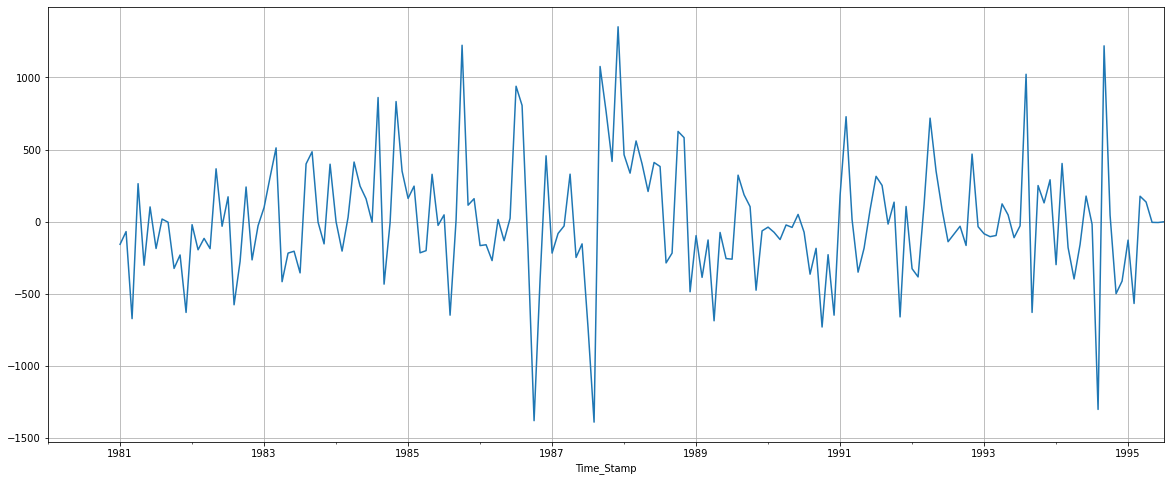

In [144]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

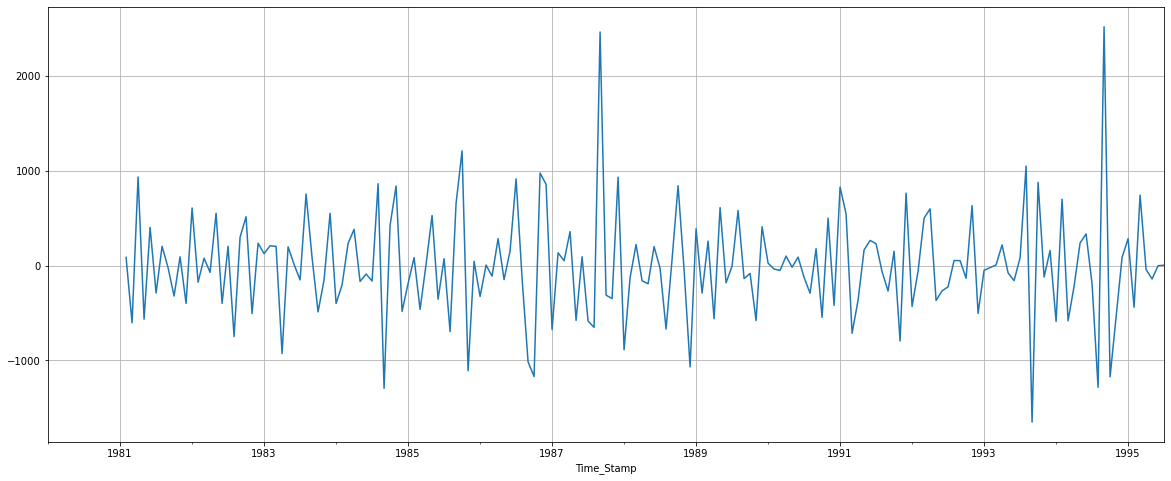

In [145]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

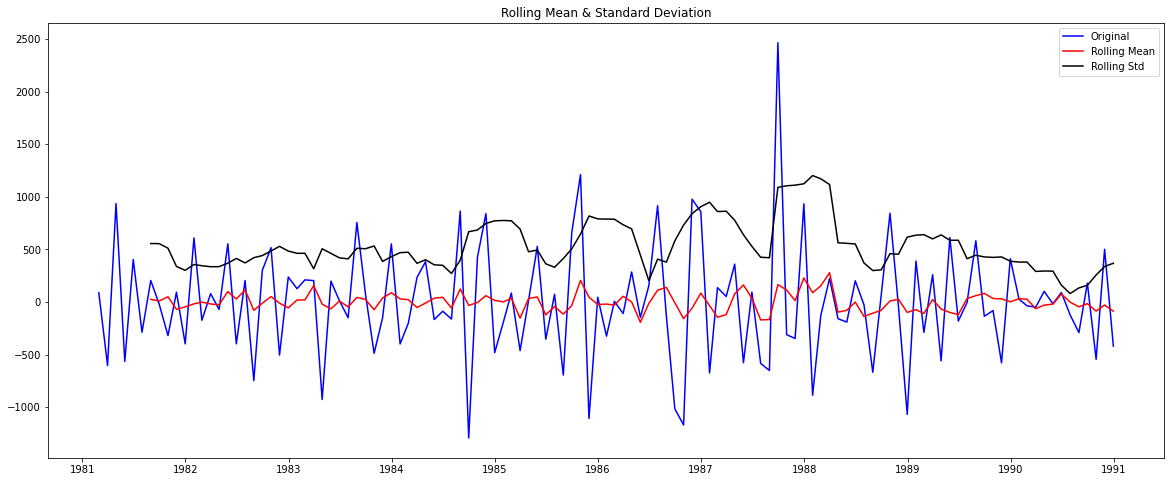

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [146]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

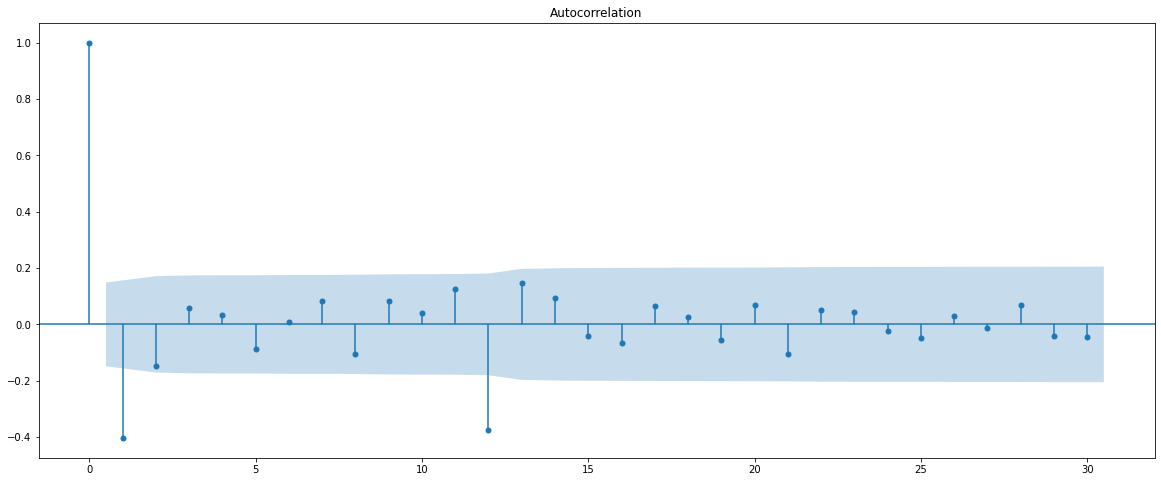

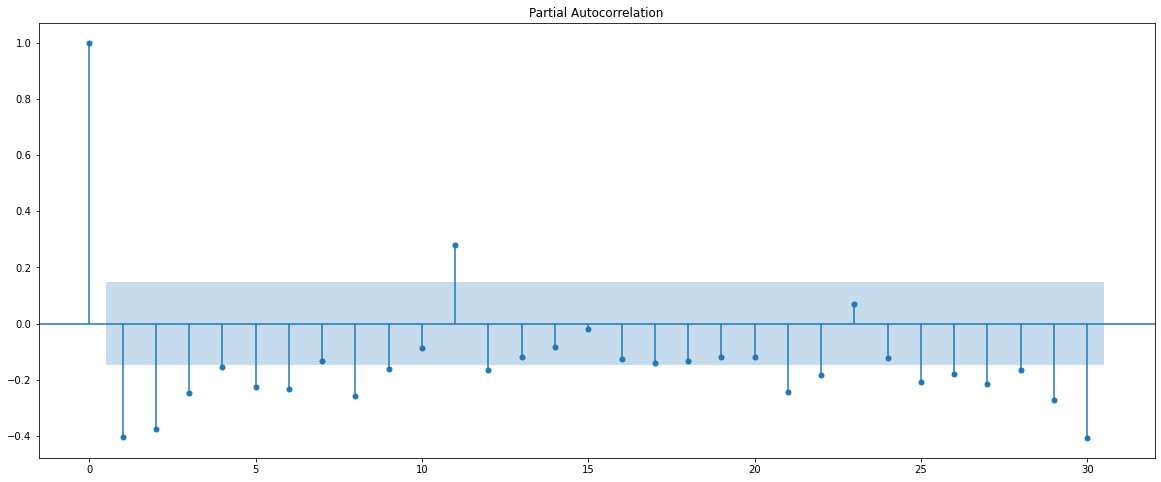

In [147]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [148]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.967
Date:                           Sun, 20 Mar 2022   AIC                           1729.934
Time:                                   19:41:03   BIC                           1751.963
Sample:                                        0   HQIC                          1738.877
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0913      1.069      0.085      0.932      -2.005       2.187
ma.L1       -210.0726    4.6e+04     -0.005

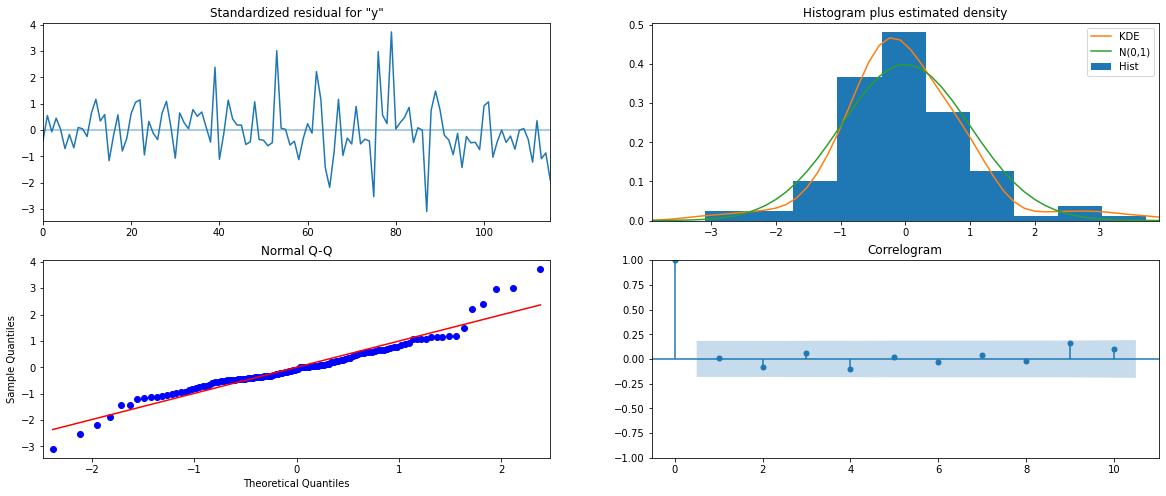

In [149]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [150]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [151]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1379.682850  384.315882     626.437562    2132.928138
1  1105.969477  391.634675     338.379619    1873.559334
2  1657.232781  394.657746     883.717812    2430.747751
3  1522.446267  397.370948     743.613521    2301.279014
4  1369.062235  400.040038     584.998169    2153.126302

In [152]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

607.9400857202551


In [153]:
## Test Data - RMSE 

rmse_model8_test = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print("For MANUAL SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model8_test))

For MANUAL SARIMA on the Test Data,  RMSE is 607.940


In [154]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model8_test]},index=['MANUAL SARIMA(1,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.012144
Alpha= 0.663, Beta= 9.966, DES        3949.993290
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1374.958048
SARIMA(0,1,2)(2,0,2,6)                 601.353424
SARIMA(1,1,2)(1,0,2,12)                528.588034
MANUAL ARIMA(0,1,2)                   1417.502239
MANUAL SARIMA(1,1,2)(2,0,2,6)          607.940086
MANUAL SARIMA(1,1,2)(2,0,2,12)         607.940086

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [155]:
resultsDf.sort_values(by='Test RMSE')

Test RMSE
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   379.695686
SARIMA(1,1,2)(1,0,2,12)                528.588034
SARIMA(0,1,2)(2,0,2,6)                 601.353424
MANUAL SARIMA(1,1,2)(2,0,2,6)          607.940086
MANUAL SARIMA(1,1,2)(2,0,2,12)         607.940086
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
Simple Average Model                  1275.081804
6point Trailing Moving Average        1283.927428
Alpha= 0.07, SES                      1338.012144
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1374.958048
Regression                            1389.135175
MANUAL ARIMA(0,1,2)                   1417.502239
Naive Model                           3864.279352
Alpha= 0.663, Beta= 9.966, DES        3949.993290

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## Building the most optimum model on the Full Data.

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters α = 0.25, β = 0.0 and γ = 0.74.

In [169]:
fullmodel = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.25,
                                                                 smoothing_trend=0.0,
                                                                 smoothing_seasonal=0.74)

In [170]:
RMSE_fullmodel = mean_squared_error(df['Sparkling'],fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 399.7914623066128


In [171]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction = fullmodel.forecast(steps=len(test))

In [172]:
# Getting the predictions for the 12 months
prediction= fullmodel.forecast(steps=12)

In [173]:
prediction

1995-08-31    1679.266722
1995-09-30    2768.527065
1995-10-31    2905.649091
1995-11-30    3327.644442
1995-12-31    5399.749252
1996-01-31    1010.934121
1996-02-29    1433.117417
1996-03-31    1830.576460
1996-04-30    1772.339841
1996-05-31    1604.364674
1996-06-30    1610.179234
1996-07-31    1859.791410
Freq: M, dtype: float64

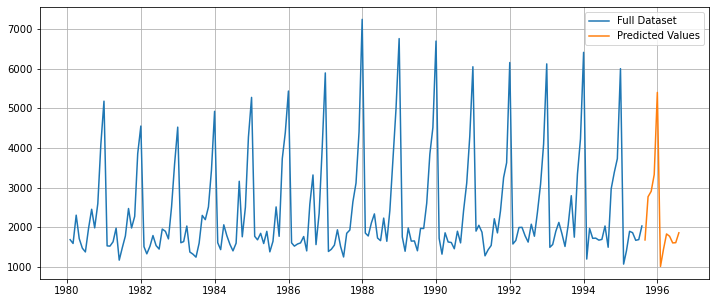

In [174]:
plt.figure(figsize=(12,5))
plt.plot(df['Sparkling'],label='Full Dataset')
plt.plot(prediction,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

In [175]:

pred_df = pd.DataFrame({'lower_CI':prediction - ((np.percentile(prediction,[2.5,97.5])))[0],
                          'prediction':prediction,
                          'upper_ci': prediction + ((np.percentile(prediction,[2.5,97.5])))[1]})
pred_df.head()

lower_CI   prediction      upper_ci
1995-08-31   552.232194  1679.266722   6509.187152
1995-09-30  1641.492537  2768.527065   7598.447494
1995-10-31  1778.614563  2905.649091   7735.569520
1995-11-30  2200.609915  3327.644442   8157.564872
1995-12-31  4272.714725  5399.749252  10229.669682

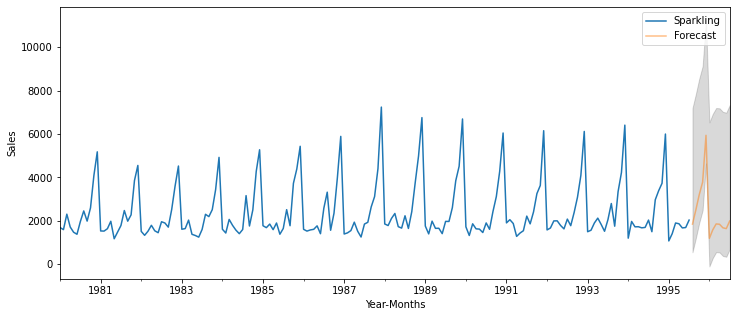

In [165]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(12,5))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

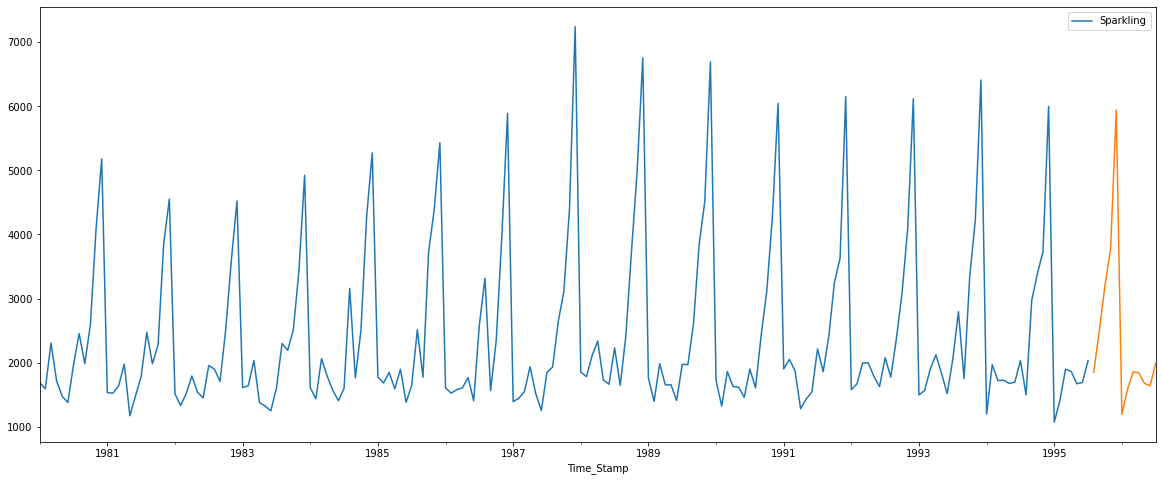

In [166]:
df.plot()
prediction.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

# PROBLEM 2

## ROSE

### 1. Read the data as an appropriate Time Series data and plot the data.

In [178]:
df = pd.read_csv('Rose.csv')
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [179]:
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [180]:
date = pd.date_range(start='1/1/1980', end='31/8/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=188, freq='M')

In [181]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [182]:
df.set_index('Time_Stamp',inplace=True)
df.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [183]:
df.drop(['YearMonth'], axis=1, inplace=True)

In [184]:
df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [185]:
df.tail()

Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [186]:
 print("The number of rows: ",df.shape[0], "\n""The number of columns: ",df.shape[1])

The number of rows:  187 
The number of columns:  1


In [187]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

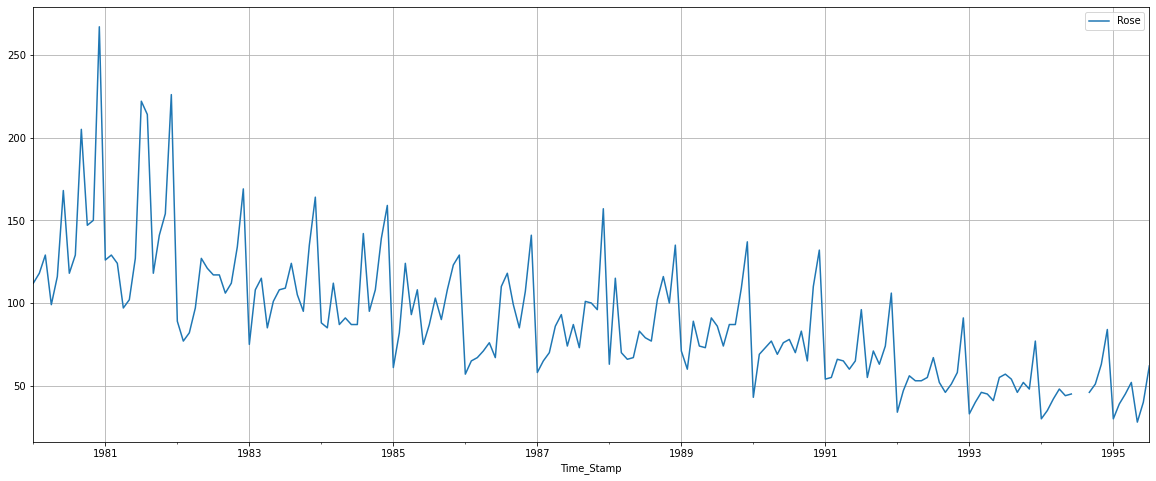

In [188]:
df.plot()
plt.grid();

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [189]:
df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [190]:
df.isnull().sum()

Rose    2
dtype: int64

In [191]:
df=df.fillna(df.mean())


In [192]:
df.isnull().sum()

Rose    0
dtype: int64

Plotting a boxplot to understand the spread of Sparkling wine sale across different years and within different months across years.

### YEARLY BOXPLOT

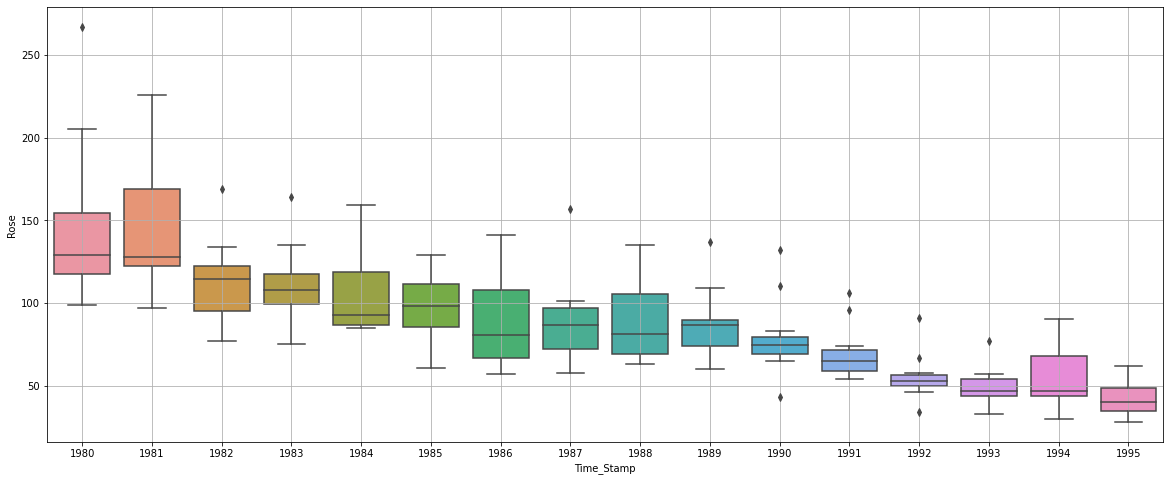

In [193]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

The yearly boxplots shows us how the sale has decreased over the past few years. The highest number of sales being recorded in the year 1981.

### MONTHLY BOXPLOTS

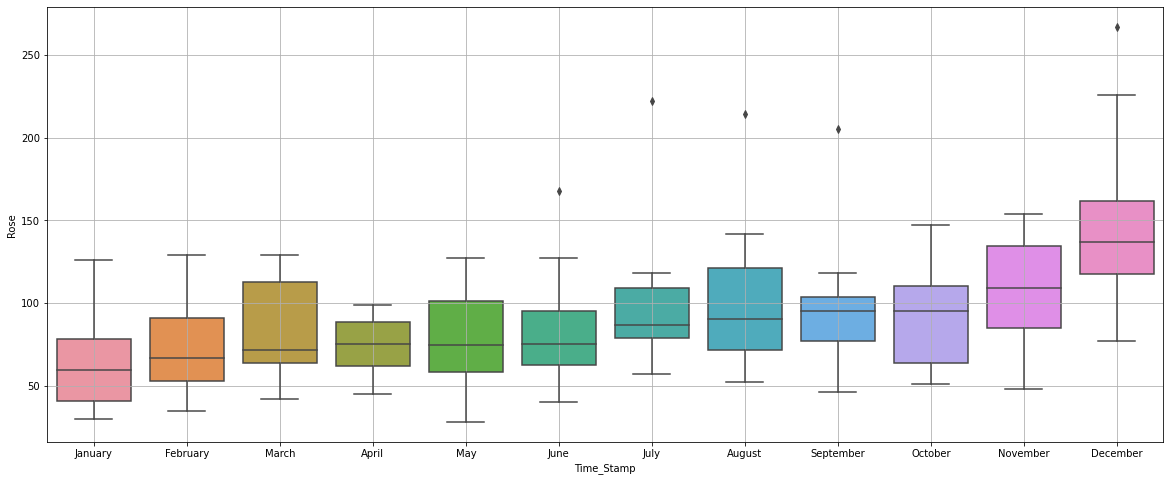

In [194]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

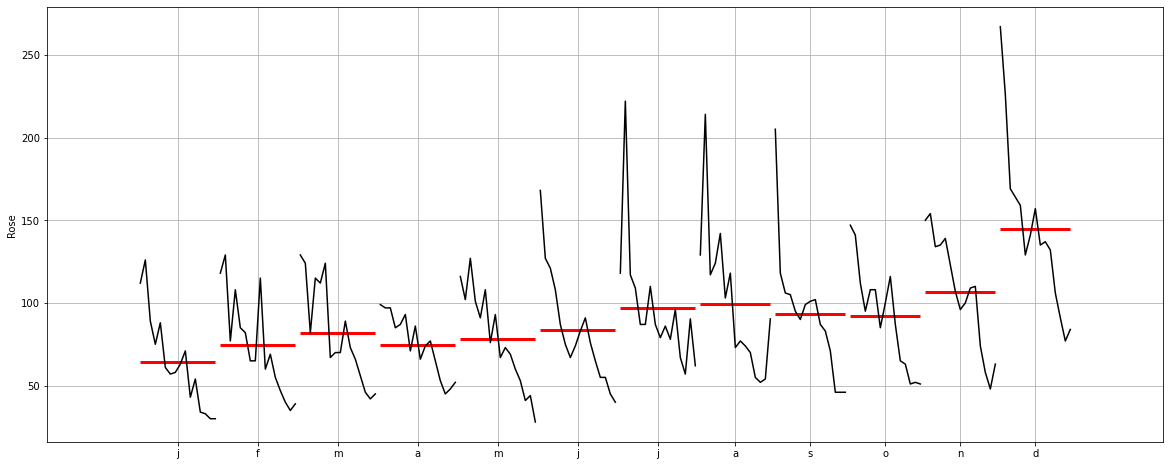

In [195]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df,ylabel='Rose')
plt.grid();

In [196]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3     4      5      6           7           8   \
Time_Stamp                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   90.394595   90.394595   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Time_Stamp     9      10     11     12  
Time_Stamp                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

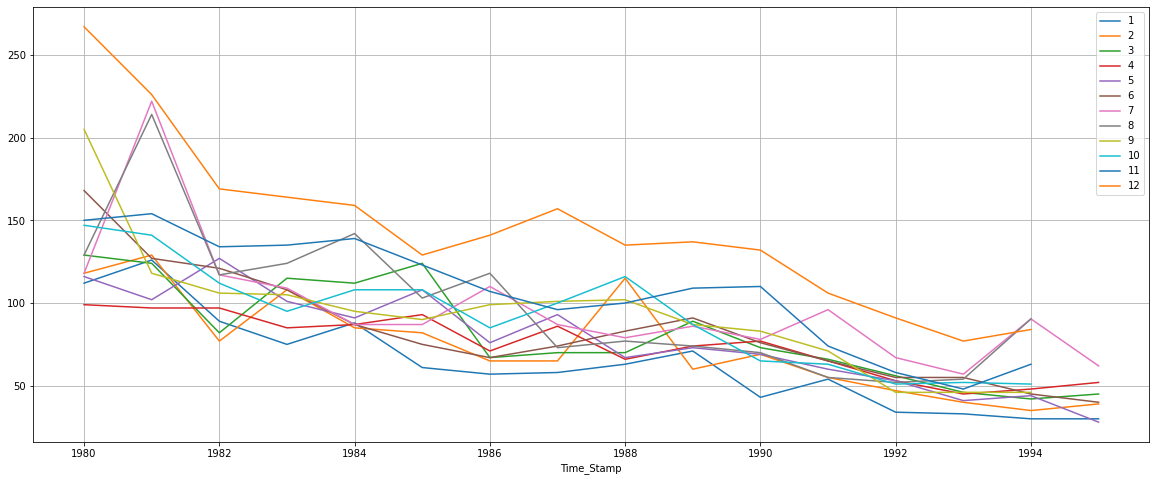

In [197]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

From the graph it can be concluded that December has the highest sale of Sparkling wine.

Plotting the Empirical Cumulative Distribution.

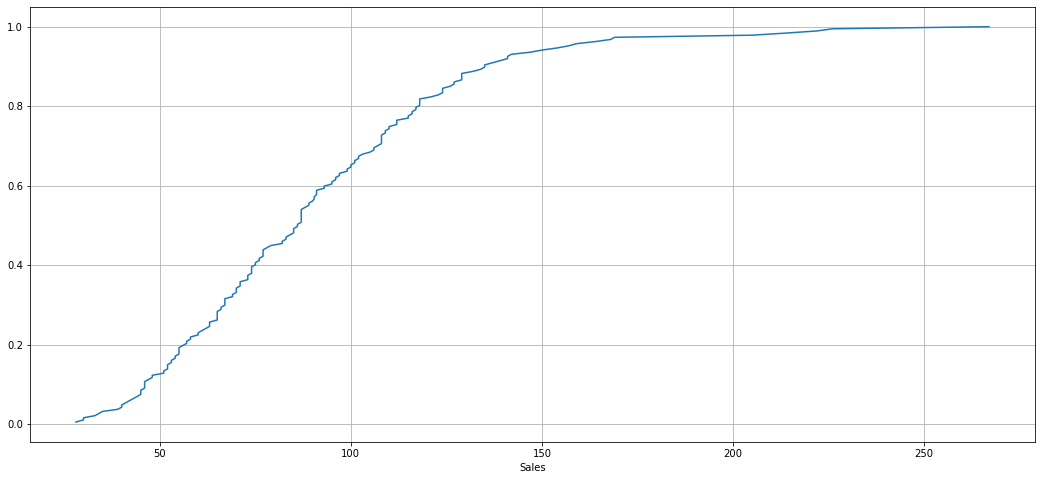

In [198]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.



Plotting the average Sparkling Sales per month and the month on month percentage change of Sparkling Sales.

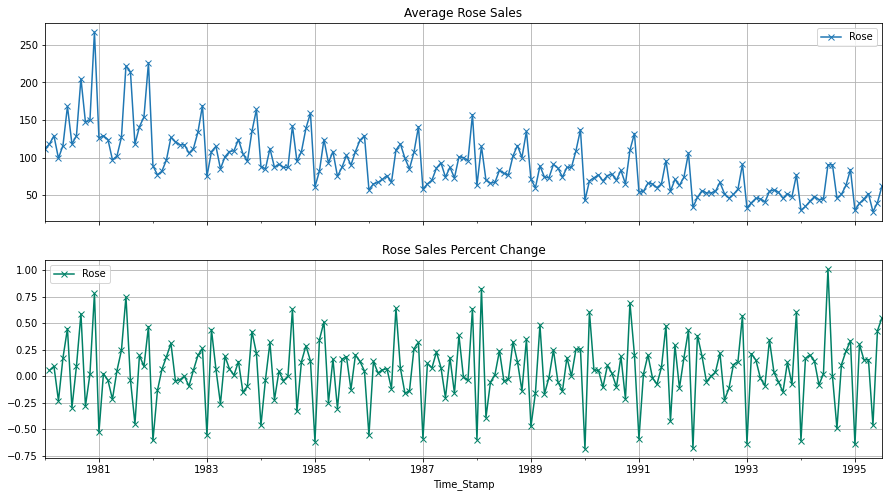

In [346]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='x',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='x',colormap="summer",title="Rose Sales Percent Change",grid=True)

The above two graphs tells us the Average 'Sparkling' Sales and the Percentage change of 'Sparkling' Sales with respect to the time.

## DECOMPOSITION

Decomposing the Time Series and plotting the different components.


ADDITIVE DECOMPOSITION

In [200]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

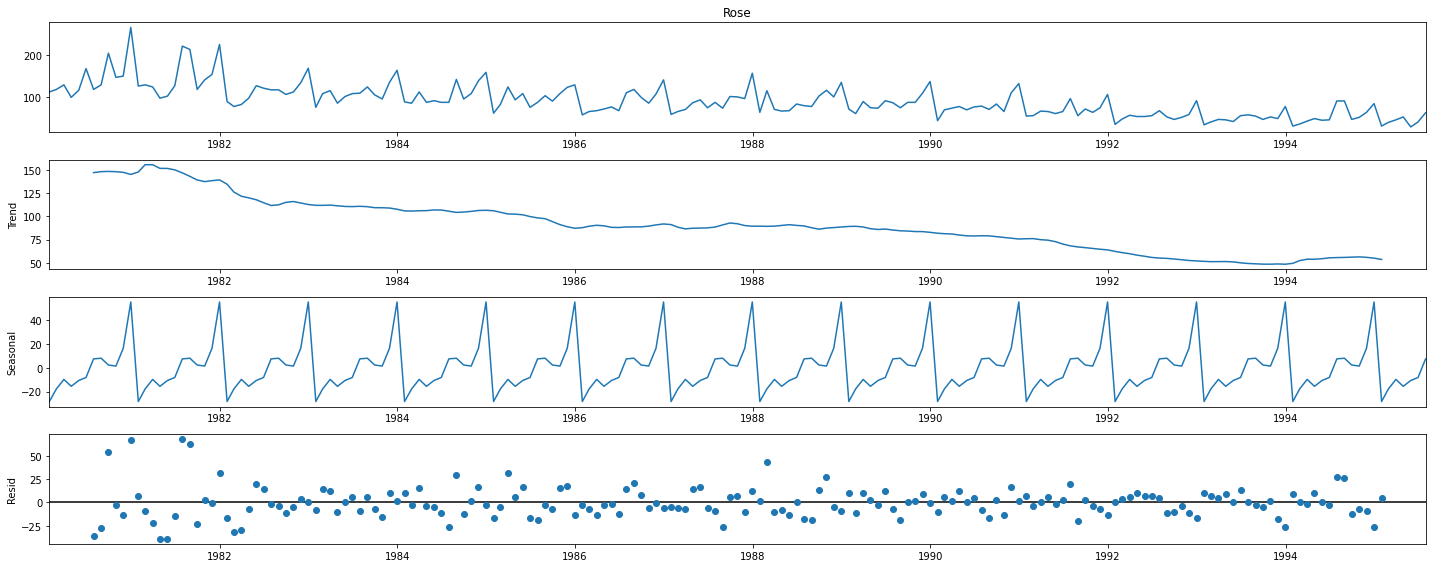

In [201]:
decomposition = seasonal_decompose(df["Rose"],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [202]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -28.403723
1980-02-29   -17.833219
1980-03-31    -9.816537
1980-04-30   -15.629037
1980-05-31   -10.727251
1980-06-30    -8.209394
1980-07-31     7.405916
1980-08-31     7.986472
1980-09-30     2.279610
1980-10-31     1.376832
1980-11-30    16.351832
1980-12-31    55.218499
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.489250
1980-08-31   -27.111472
1980-09-30    54.345390
1980-10-31    -2.460165
1980-11-30   -13.768499
1980-12-31    66.65

MULTIPLICATIVE DECOMPOSITION

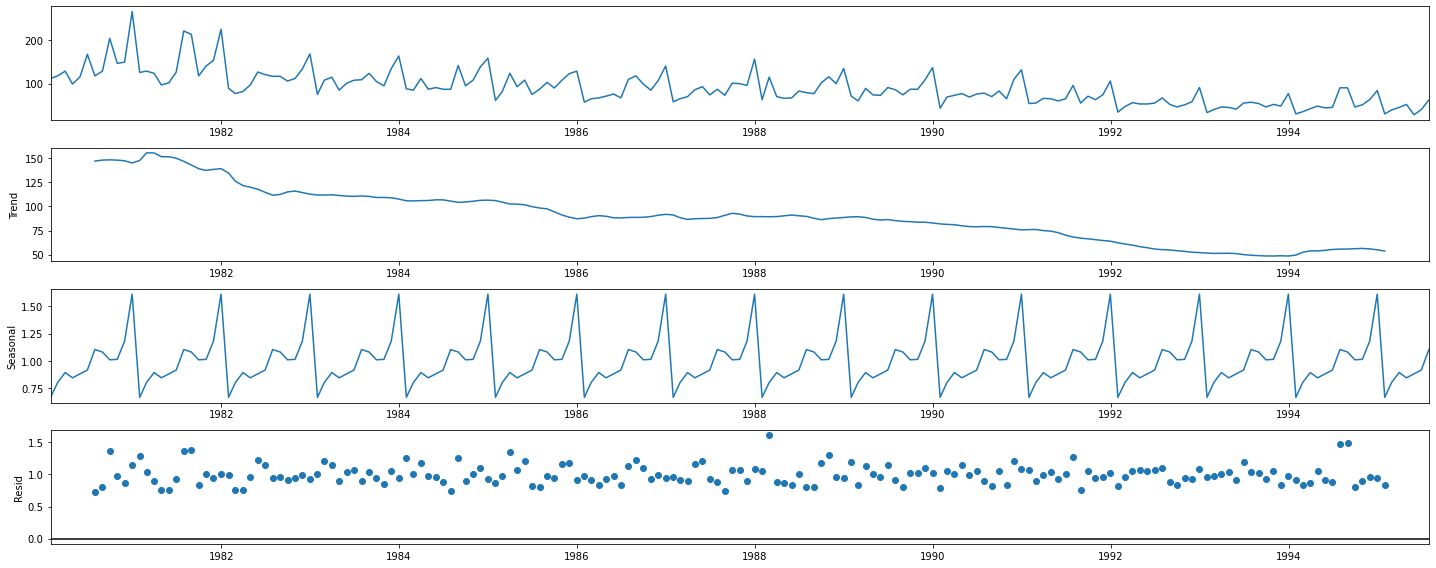

In [203]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [204]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.664388
1980-02-29    0.800694
1980-03-31    0.892495
1980-04-30    0.844044
1980-05-31    0.880516
1980-06-30    0.915220
1980-07-31    1.103899
1980-08-31    1.081169
1980-09-30    1.009574
1980-10-31    1.013692
1980-11-30    1.181135
1980-12-31    1.613174
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.726757
1980-08-31    0.805504
1980-09-30    1.368532
1980-10-31    0.979276
1980-11-30    0.861480
1980-12-31    1.140480
Name: resid, dtype:

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

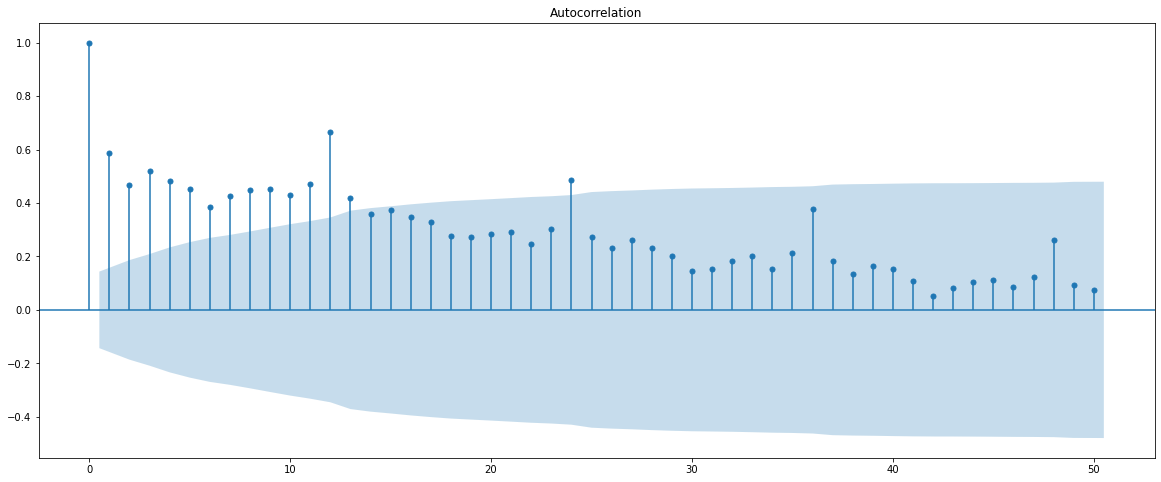

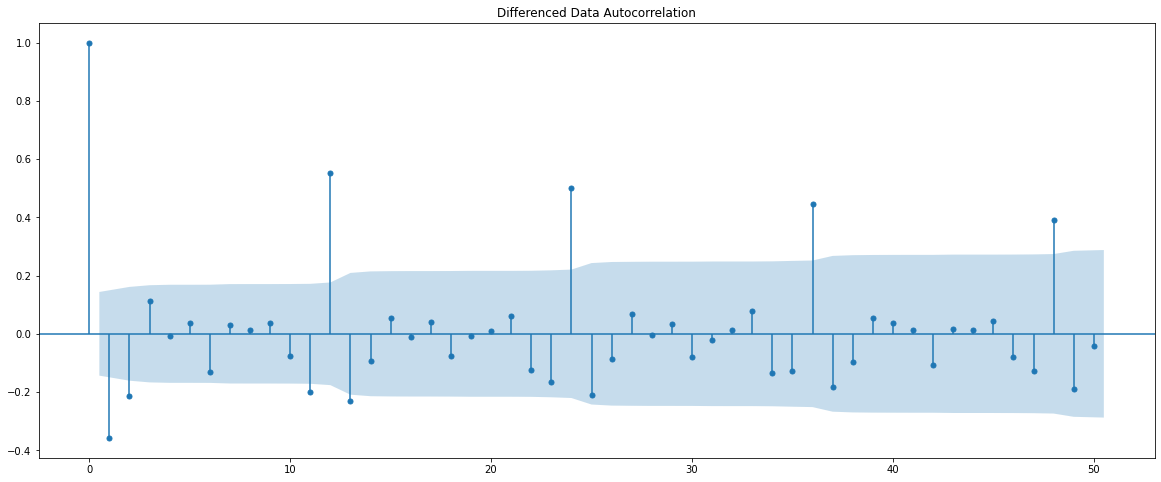

In [205]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

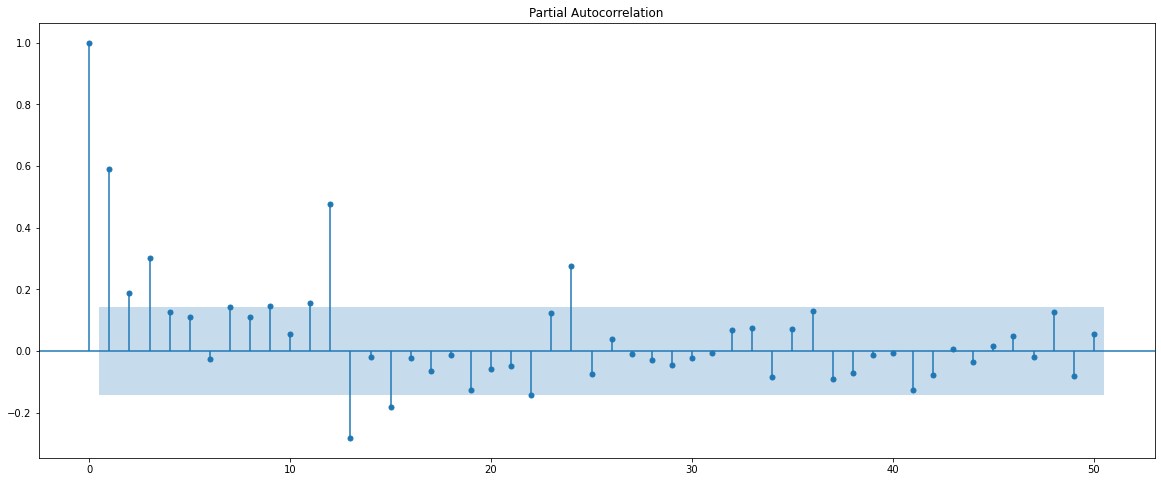

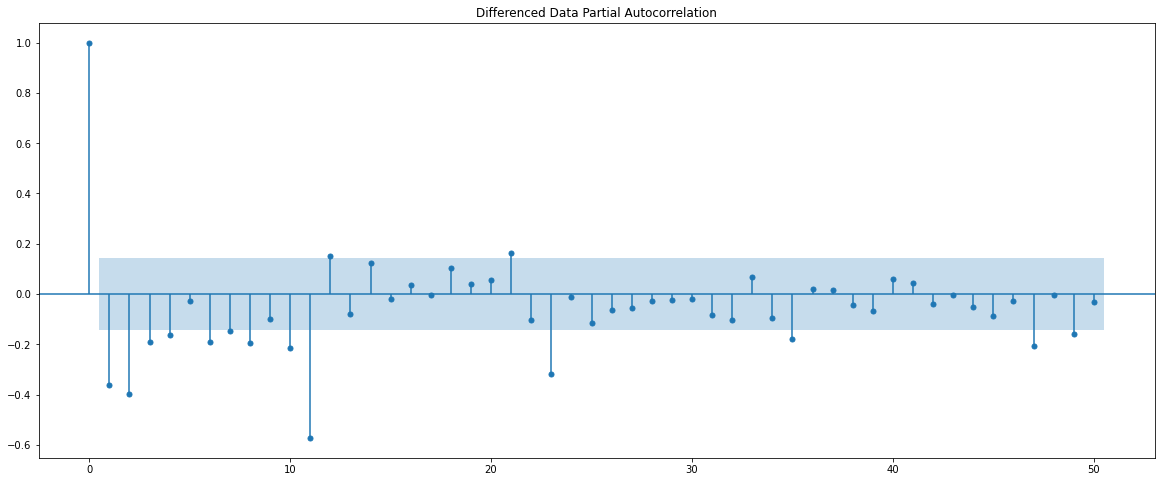

In [206]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data

## 3. Split the data into training and test. The test data should start in 1991.

Splitting the data into train and test and plotting the training and test data. Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [207]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [208]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [209]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

### Checking for stationarity of the Training Data Time Series.

In [210]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

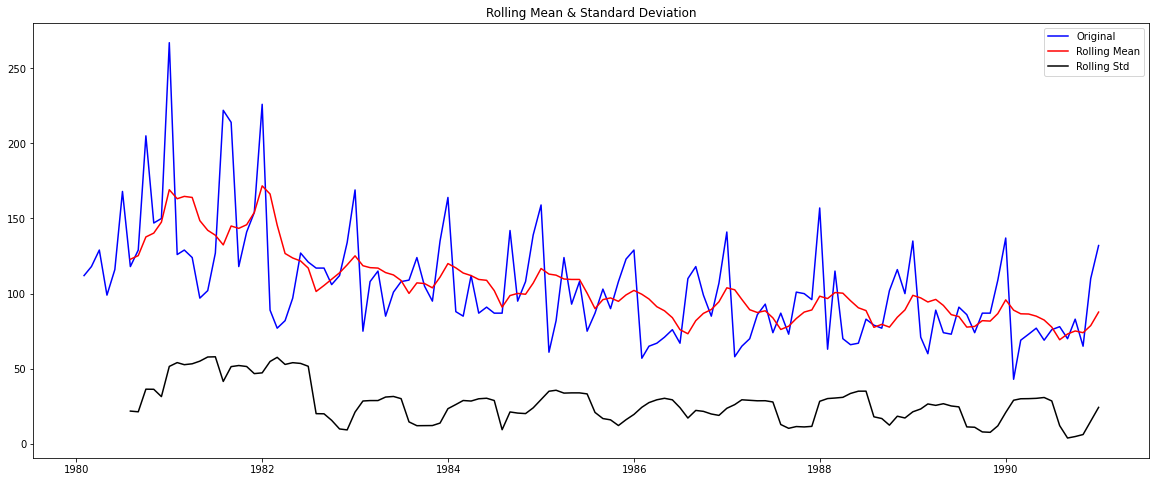

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [211]:
test_stationarity(train['Rose'])

We see that the series is not stationary at 𝛼 = 0.05.

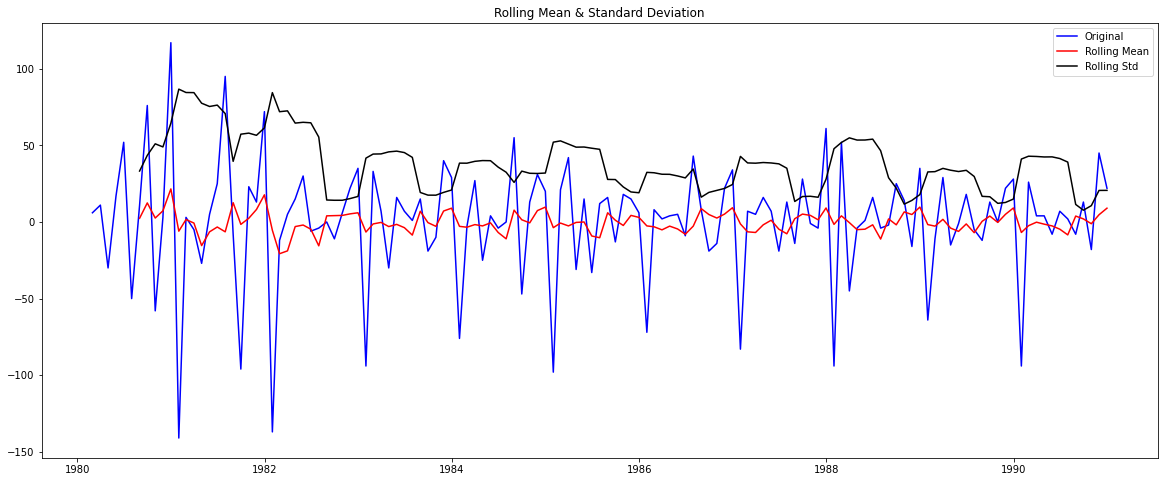

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [212]:
test_stationarity(train['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at 𝛼 = 0.05.

In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

#### SIMPLE EXPONENTIAL SMOOTHING MODEL

SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value

In [214]:
SES_train = train.copy()
SES_test = test.copy()

In [215]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [216]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [217]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874933517484011,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38703609891138,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be at 0.098.

In [218]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    87.104984
1991-02-28    87.104984
1991-03-31    87.104984
1991-04-30    87.104984
1991-05-31    87.104984
1991-06-30    87.104984
1991-07-31    87.104984
1991-08-31    87.104984
1991-09-30    87.104984
1991-10-31    87.104984
1991-11-30    87.104984
1991-12-31    87.104984
1992-01-31    87.104984
1992-02-29    87.104984
1992-03-31    87.104984
1992-04-30    87.104984
1992-05-31    87.104984
1992-06-30    87.104984
1992-07-31    87.104984
1992-08-31    87.104984
1992-09-30    87.104984
1992-10-31    87.104984
1992-11-30    87.104984
1992-12-31    87.104984
1993-01-31    87.104984
1993-02-28    87.104984
1993-03-31    87.104984
1993-04-30    87.104984
1993-05-31    87.104984
1993-06-30    87.104984
1993-07-31    87.104984
1993-08-31    87.104984
1993-09-30    87.104984
1993-10-31    87.104984
1993-11-30    87.104984
1993-12-31    87.104984
1994-01-31    87.104984
1994-02-28    87.104984
1994-03-31    87.104984
1994-04-30    87.104984
1994-05-31    87.104984
1994-06-30    87

In [219]:
rcParams['figure.figsize'] = 20,8

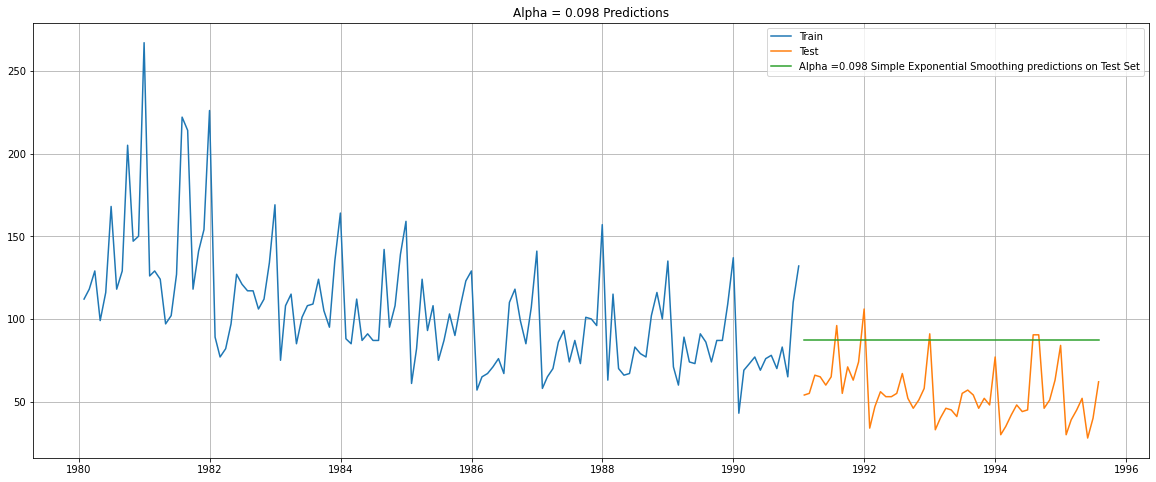

In [220]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.098 Predictions');

In [221]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [222]:
print('Simple Exponential Smoothing RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('Simple Exponential Smoothing RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

Simple Exponential Smoothing RMSE: 35.936198483436414
Simple Exponential Smoothing RMSE (calculated using statsmodels): 35.93619848343641


In [223]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha= 0.07, SES'])
resultsDf

Test RMSE
Alpha= 0.07, SES  35.936198

#### DOUBLE EXPONENTIAL SMOOTHING

In [224]:
DES_train = train.copy()
DES_test = test.copy()

In [225]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.9086427682180844e-08, 'smoothing_trend': 7.302464353829351e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81629861505857, 'initial_trend': -0.4943753249082896, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [226]:
print(model_DES.params)

{'smoothing_level': 1.9086427682180844e-08, 'smoothing_trend': 7.302464353829351e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81629861505857, 'initial_trend': -0.4943753249082896, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


ALPHA= 1.908, Beta= 7.302

In [227]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    72.064380
1991-02-28    71.570005
1991-03-31    71.075630
1991-04-30    70.581254
1991-05-31    70.086879
1991-06-30    69.592504
1991-07-31    69.098128
1991-08-31    68.603753
1991-09-30    68.109378
1991-10-31    67.615002
1991-11-30    67.120627
1991-12-31    66.626252
1992-01-31    66.131877
1992-02-29    65.637501
1992-03-31    65.143126
1992-04-30    64.648751
1992-05-31    64.154375
1992-06-30    63.660000
1992-07-31    63.165625
1992-08-31    62.671249
1992-09-30    62.176874
1992-10-31    61.682499
1992-11-30    61.188123
1992-12-31    60.693748
1993-01-31    60.199373
1993-02-28    59.704997
1993-03-31    59.210622
1993-04-30    58.716247
1993-05-31    58.221871
1993-06-30    57.727496
1993-07-31    57.233121
1993-08-31    56.738745
1993-09-30    56.244370
1993-10-31    55.749995
1993-11-30    55.255619
1993-12-31    54.761244
1994-01-31    54.266869
1994-02-28    53.772493
1994-03-31    53.278118
1994-04-30    52.783743
1994-05-31    52.289367
1994-06-30    51

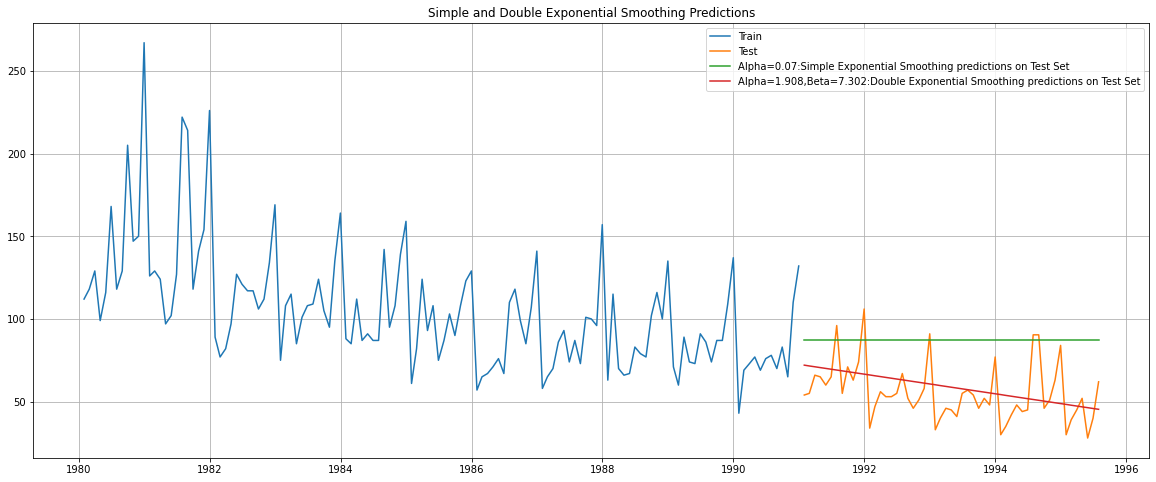

In [228]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.908,Beta=7.302:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [229]:
print('Double Exponential Smoothing RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

Double Exponential Smoothing RMSE: 16.979631467541886


In [230]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha= 1.908, Beta= 7.302, DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                35.936198
Alpha= 1.908, Beta= 7.302, DES  16.979631

Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Single Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model was able to pick up the trend component available in the data.

### TRIPLE EXPONENTIAL SMOOTHING

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [231]:
TES_train = train.copy()
TES_test = test.copy()

In [232]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08830330642635406, 'smoothing_trend': 6.730635331927582e-05, 'smoothing_seasonal': 0.004455138229351625, 'damping_trend': nan, 'initial_level': 146.88752868155674, 'initial_trend': -0.5492163940406024, 'initial_seasons': array([-31.12207537, -18.81171138, -10.86052241, -21.52235816,
       -12.68359535,  -7.17529564,   2.7456236 ,   8.84900094,
         4.85724354,   2.9520333 ,  21.05004912,  63.29916317]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [233]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31     42.672382
1991-02-28     54.439917
1991-03-31     61.841877
1991-04-30     50.636896
1991-05-31     58.918913
1991-06-30     63.870294
1991-07-31     73.240626
1991-08-31     78.790723
1991-09-30     74.257853
1991-10-31     71.805821
1991-11-30     89.354796
1991-12-31    131.072194
1992-01-31     36.081787
1992-02-29     47.849323
1992-03-31     55.251283
1992-04-30     44.046301
1992-05-31     52.328318
1992-06-30     57.279699
1992-07-31     66.650031
1992-08-31     72.200129
1992-09-30     67.667259
1992-10-31     65.215226
1992-11-30     82.764201
1992-12-31    124.481599
1993-01-31     29.491193
1993-02-28     41.258728
1993-03-31     48.660688
1993-04-30     37.455706
1993-05-31     45.737724
1993-06-30     50.689105
1993-07-31     60.059436
1993-08-31     65.609534
1993-09-30     61.076664
1993-10-31     58.624632
1993-11-30     76.173607
1993-12-31    117.891005
1994-01-31     22.900598
1994-02-28     34.668134
1994-03-31     42.070093
1994-04-30     30.865112


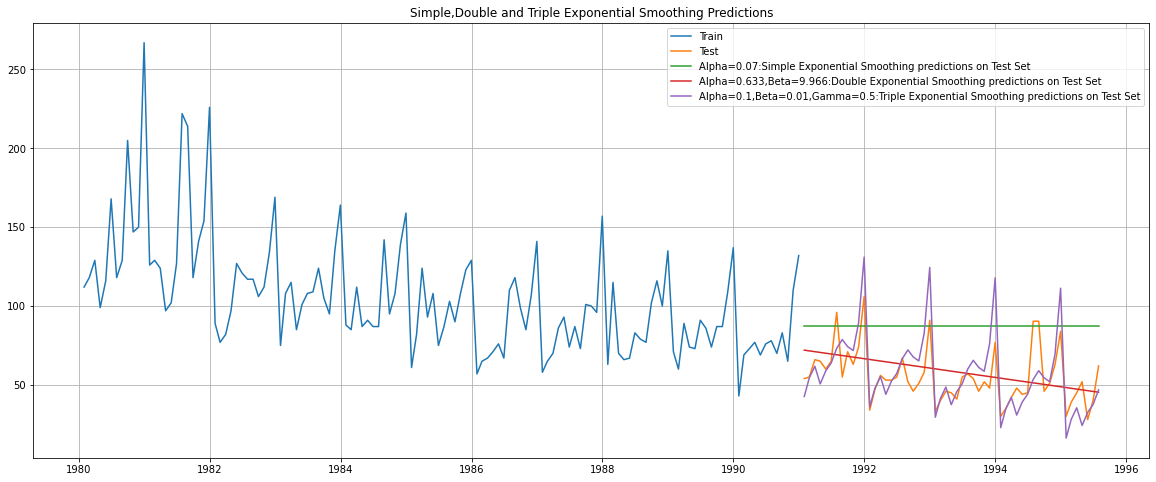

In [234]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.633,Beta=9.966:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.1,Beta=0.01,Gamma=0.5:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well as the trend.

In [235]:
print('Triple Exponential Smoothing RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

Triple Exponential Smoothing RMSE: 15.548489757559484


In [236]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.1, Beta=0.01, Gamma=0.5, TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

In [237]:
TES_train = train.copy()
TES_test = test.copy()

In [238]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [239]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [240]:
model_TES_autofit.params

{'smoothing_level': 0.06571007449183297,
 'smoothing_trend': 0.051867105713176015,
 'smoothing_seasonal': 0.0015637515713898,
 'damping_trend': nan,
 'initial_level': 47.81887301367471,
 'initial_trend': -0.2961562797665537,
 'initial_seasons': array([2.35763018, 2.67367218, 2.92146068, 2.55308191, 2.87099548,
        3.13124987, 3.44178442, 3.66118656, 3.47154364, 3.39670325,
        3.95879831, 5.46173463]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [241]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     56.677627
1991-02-28  55.0     64.136371
1991-03-31  66.0     69.860745
1991-04-30  65.0     60.897998
1991-05-31  60.0     68.228324

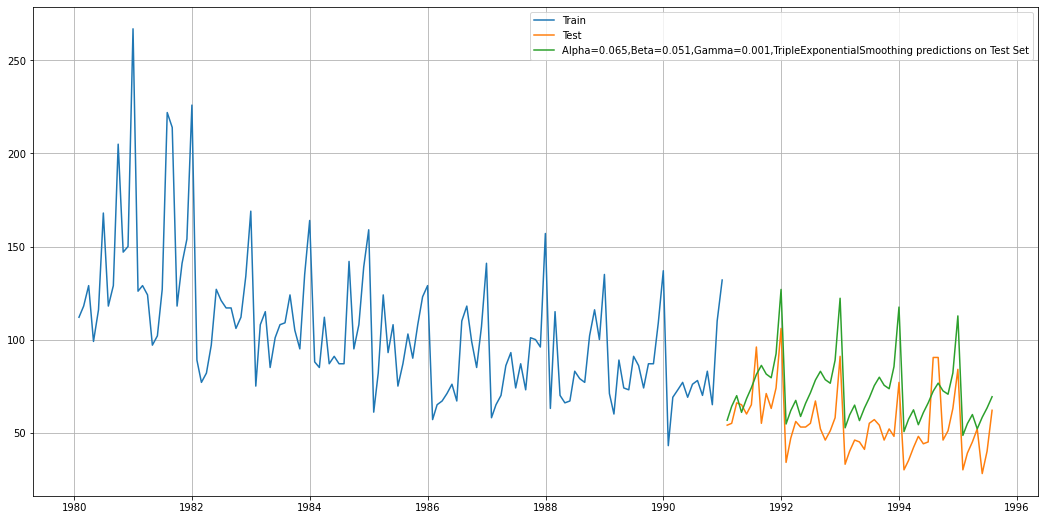

In [242]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.065,Beta=0.051,Gamma=0.001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [243]:
## Test Data

rmse_model_test_1 = mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.065,Beta=0.051,Gamma=0.001, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model_test_1))

For Alpha=0.065,Beta=0.051,Gamma=0.001, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.480


In [244]:
resultsDf_8_2 = pd.DataFrame({'Test RMSE': [rmse_model_test_1]}
                           ,index=['Alpha=0.065,Beta=0.051,Gamma=0.001,TripleExponentialSmoothing'])

resultsDf_8_2 = pd.concat([resultsDf, resultsDf_temp])
resultsDf_8_2

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490

In [245]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [246]:
from sklearn import metrics

In [247]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [248]:
resultsDf_8.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
8            0.3          0.4           0.3   28.111886  13.488427
1            0.3          0.3           0.4   27.399095  15.170107
69           0.4          0.3           0.8   32.601491  15.368526
16           0.3          0.5           0.3   29.087520  18.152710
0            0.3          0.3           0.3   27.217969  19.433604

### LINEAR REGRESSION 

In [249]:
len(df)

187

In [250]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [251]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [252]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [253]:
from sklearn.linear_model import LinearRegression

In [254]:
lr = LinearRegression()

In [255]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [256]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

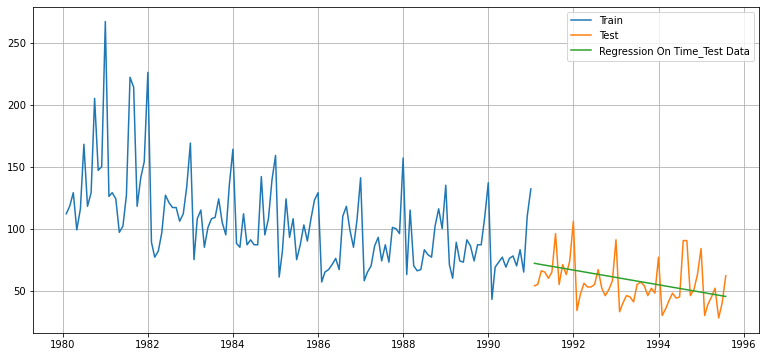

In [257]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [258]:
## Test Data - RMSE

rmse_model1_test = mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 16.979


In [259]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model1_test]}
                           ,index=['Regression'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
Regression                            16.979414

### NAIVE APPROACH

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [260]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [261]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

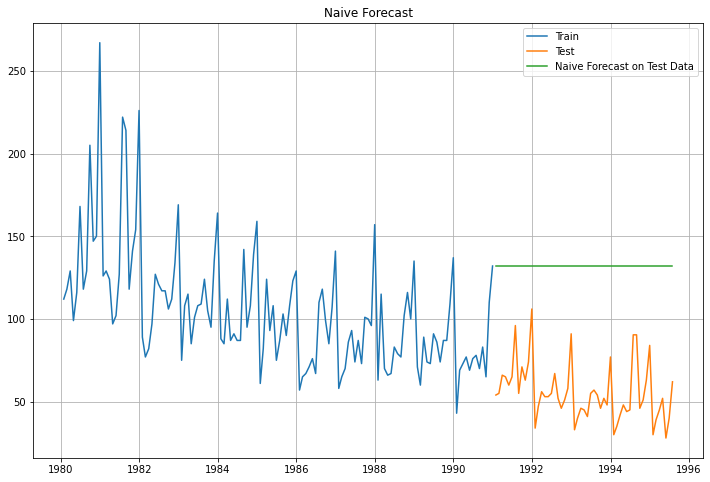

In [262]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [263]:
## Test Data - RMSE

rmse_model2_test = mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.396


In [264]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
Regression                            16.979414
Naive Model                           78.396083

### SIMPLE AVERAGE

For this particular simple average method, we will forecast by using the average of the training values.

In [265]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [266]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

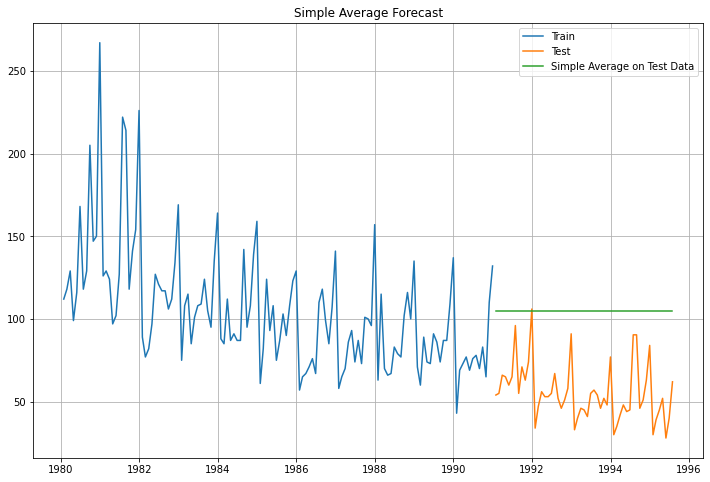

In [267]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [268]:
## Test Data - RMSE 

rmse_model3_test = mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.319


In [269]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
Regression                            16.979414
Naive Model                           78.396083
Simple Average Model                  52.318735

### MOVING AVERAGE

In [270]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [271]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

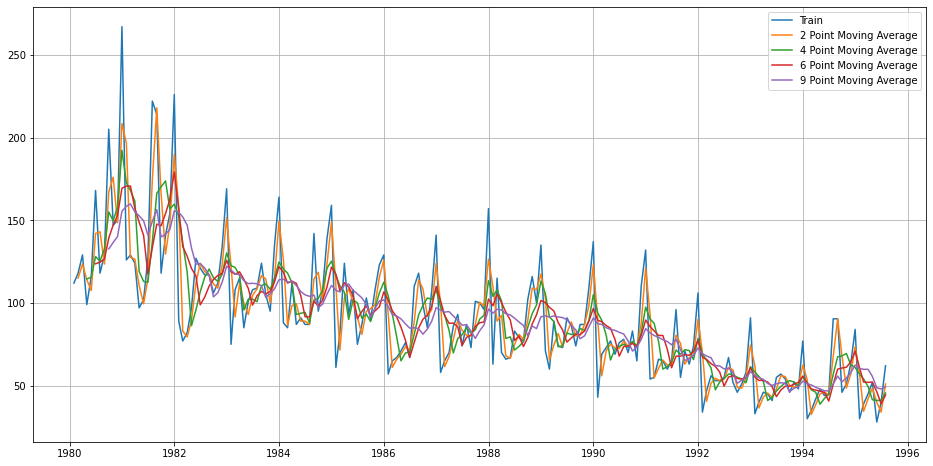

In [272]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [273]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year>=1991]

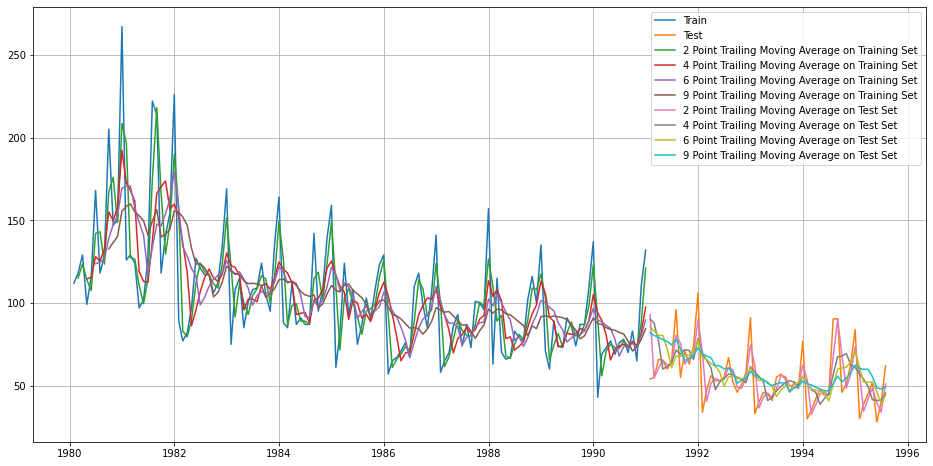

In [274]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [275]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 12.298
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.846
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.986
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.501 


In [276]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2point Trailing Moving Average','4 point Trailing Moving Average'
                                   ,'6point Trailing Moving Average','9 point Trailing Moving Average'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
Regression                            16.979414
Naive Model                           78.396083
Simple Average Model                  52.318735
2point Trailing Moving Average        12.298291
4 point Trailing Moving Average       15.845558
6point Trailing Moving Average        15.986163
9 point Trailing Moving Average       16.500823

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

H0 : The Time Series has a unit root and is thus non-stationary.

H1 : The Time Series does not have a unit root and is thus stationary. We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

In [277]:
from statsmodels.tsa.stattools import adfuller

In [278]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.443
DF test p-value is 0.35712504484559315
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [279]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.988
DF test p-value is 7.599609649114865e-11
Number of lags used 12


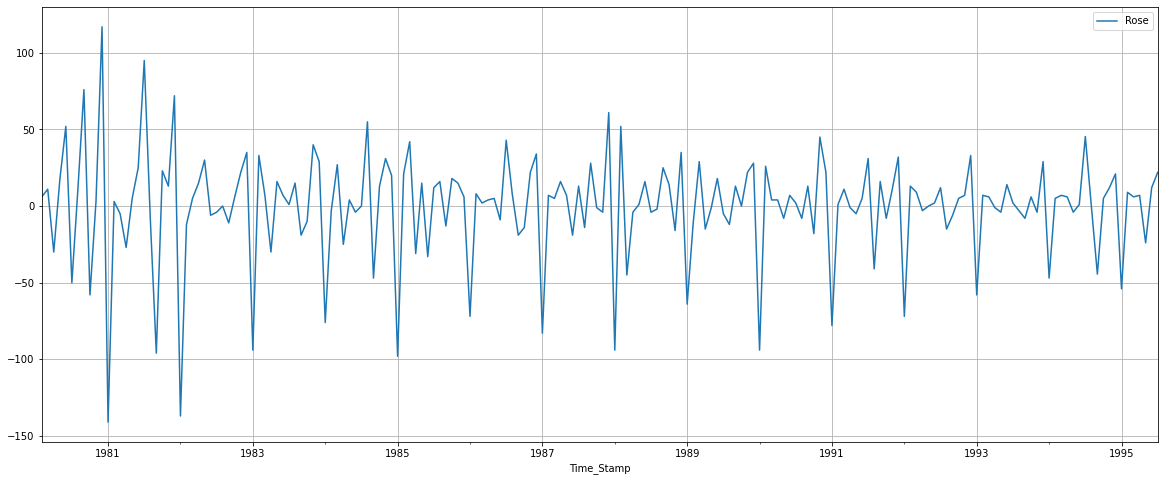

In [280]:
df.diff().dropna().plot(grid=True);

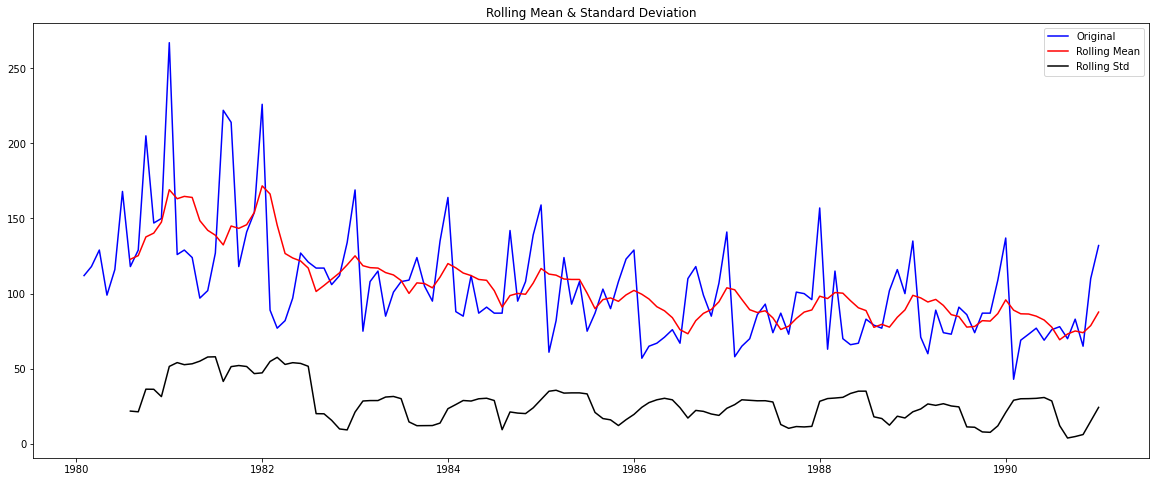

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [281]:
test_stationarity(train['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

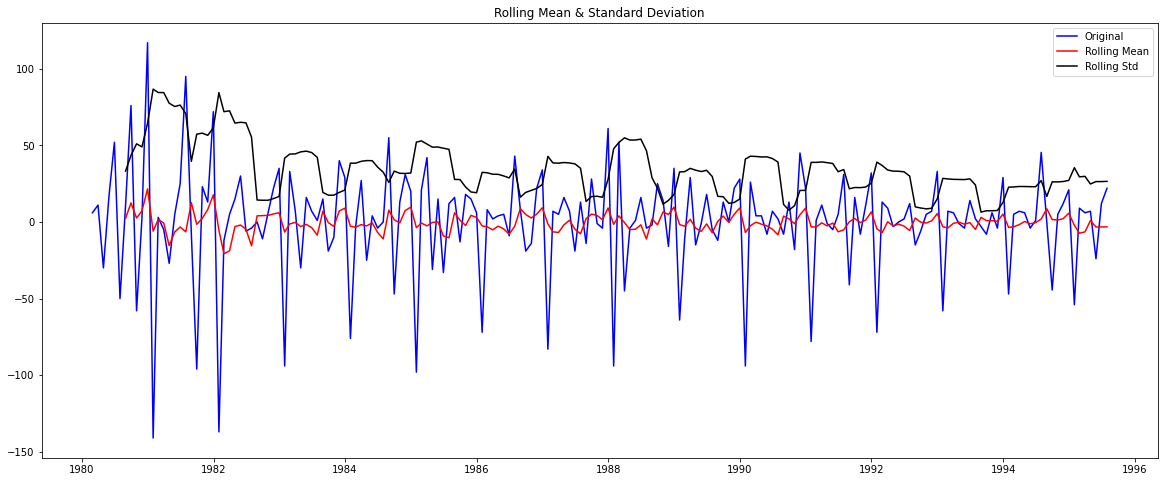

Results of Dickey-Fuller Test:
Test Statistic                -7.855944e+00
p-value                        5.442646e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [282]:
test_stationarity(df['Rose'].diff().dropna())

We see that at 𝛼 = 0.05 the Time Series is indeed stationary.

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [283]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [284]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [285]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464035
ARIMA(0, 1, 2) - AIC:1276.8353726229147
ARIMA(1, 1, 0) - AIC:1319.348310580781
ARIMA(1, 1, 1) - AIC:1277.7757468404075
ARIMA(1, 1, 2) - AIC:1277.359225603172
ARIMA(2, 1, 0) - AIC:1300.6092611745498
ARIMA(2, 1, 1) - AIC:1279.0456894093106
ARIMA(2, 1, 2) - AIC:1279.2986939364973


In [286]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835373
5  (1, 1, 2)  1277.359226
4  (1, 1, 1)  1277.775747
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [287]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 20 Mar 2022   AIC                           1276.835
Time:                        19:56:00   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

### Predict on the Test Set using this model and evaluate the model.

In [288]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [289]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

17.27965342842907


In [290]:
## Test Data - RMSE 

rmse_model4_test = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print("For ARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For ARIMA on the Test Data,  RMSE is 17.280


In [291]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model4_test]},index=['ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
Regression                            16.979414
Naive Model                           78.396083
Simple Average Model                  52.318735
2point Trailing Moving Average        12.298291
4 point Trailing Moving Average       15.845558
6point Trailing Moving Average        15.986163
9 point Trailing Moving Average       16.500823
ARIMA(0,1,2)                          17.279653

## AUTO SARIMA

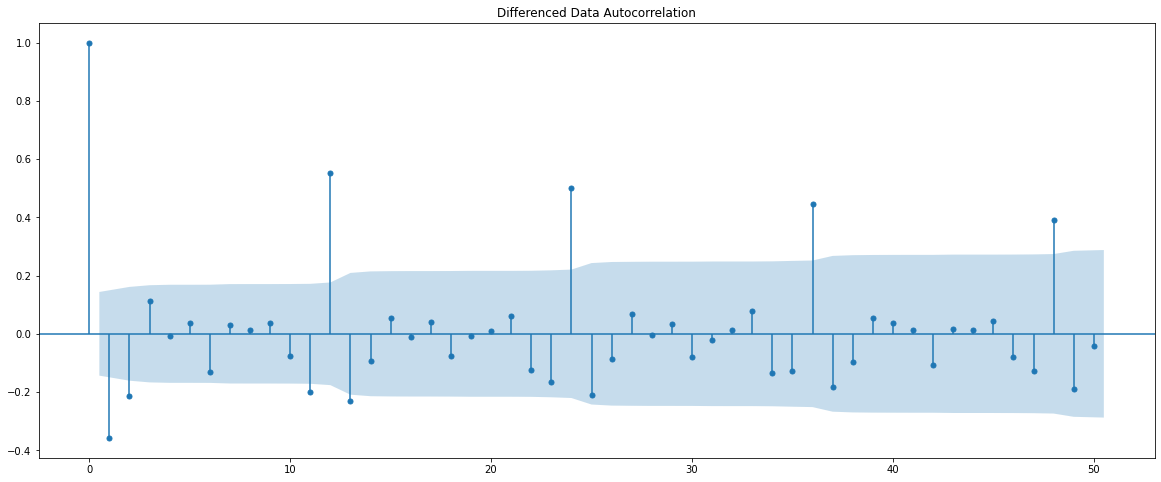

In [292]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [293]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [294]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [295]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113863
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827322
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149089
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721867
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515088
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.022442617828
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029548
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752782
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745048
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746572
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564124701688
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982587
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455184004067
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082634993
SARIMA(0, 1, 2)x(0, 0, 0, 6) 

In [296]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1041.655821
26  (0, 1, 2)  (2, 0, 2, 6)  1043.600261
80  (2, 1, 2)  (2, 0, 2, 6)  1045.220397
71  (2, 1, 1)  (2, 0, 2, 6)  1051.673461
44  (1, 1, 1)  (2, 0, 2, 6)  1052.778470

In [297]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 20 Mar 2022   AIC                           1041.656
Time:                                   19:56:17   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5941      0.152     -3.901      0.000      -0.893      -0.296
ma.L1         -0.1954    142.307     -0.001

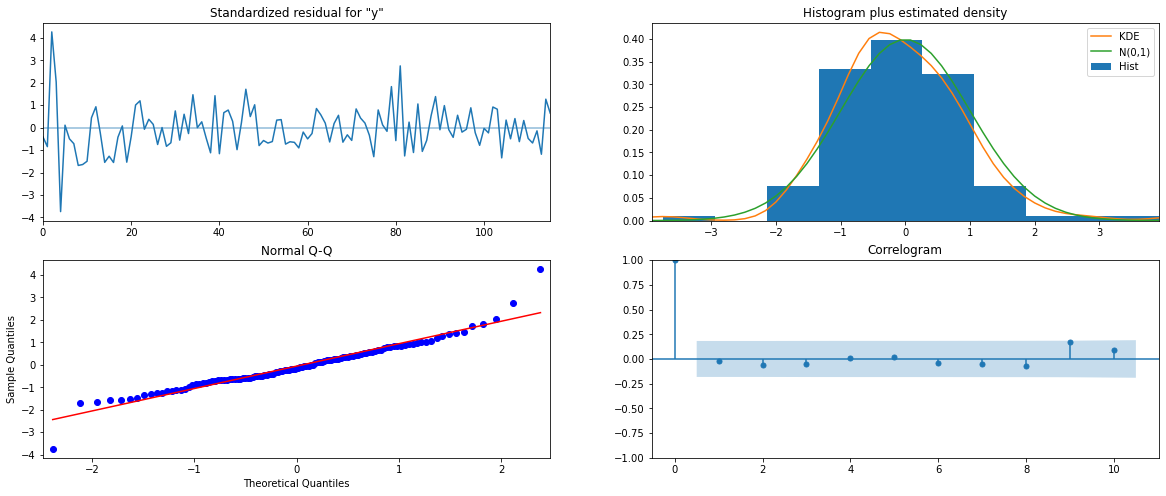

In [298]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model.

In [299]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [300]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.844676  18.847421      25.904411      99.784942
1  67.632024  19.298791      29.807088     105.456959
2  74.748393  19.411287      36.702969     112.793817
3  71.327548  19.474230      33.158758     109.496338
4  76.019526  19.482517      37.834496     114.204557

In [301]:
rmse_model5_test = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

17.27965342842907


In [302]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
Regression                            16.979414
Naive Model                           78.396083
Simple Average Model                  52.318735
2point Trailing Moving Average        12.298291
4 point Trailing Moving Average       15.845558
6point Trailing Moving Average        15.986163
9 point Trailing Moving Average       16.500823
ARIMA(0,1,2)                          17.279653
SARIMA(1,1,2)(2,0,2,6)                17.279653

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [303]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [304]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [305]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207525
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386875
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752474
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697533
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945699
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383752
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491829
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947895
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483315454
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535874
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461671
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988261883185
SARIMA(0, 1, 2)x(0, 0,

In [306]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
53  (1, 1, 2)  (2, 0, 2, 12)  896.686964
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [307]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 20 Mar 2022   AIC                            887.938
Time:                                    19:56:39   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    190.073     -0.004      0.996    -373.380     371.694
ma.L2         -0.1573     29.862   

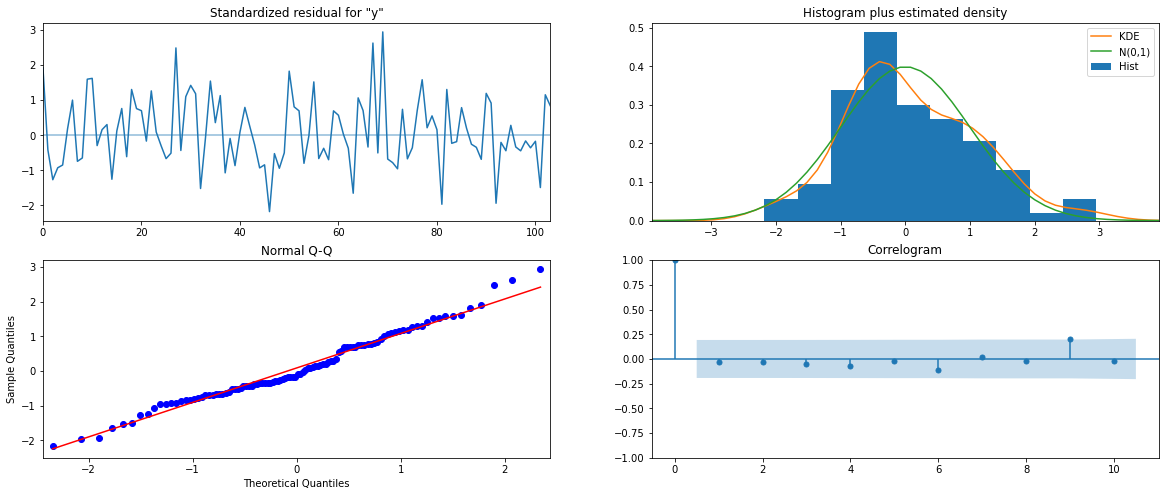

In [308]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

### Predict on the Test Set using this model and evaluate the model.

In [309]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [310]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867265  15.928501      31.647977      94.086554
1  70.541190  16.147659      38.892360     102.190021
2  77.356411  16.147657      45.707585     109.005237
3  76.208814  16.147657      44.559988     107.857640
4  72.747398  16.147657      41.098572     104.396224

In [311]:
## Test Data - RMSE 

rmse_model5_12_test = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print("For SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model5_12_test))

For SARIMA on the Test Data,  RMSE is 26.417


In [312]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model5_12_test]},index=['SARIMA(0,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
Regression                            16.979414
Naive Model                           78.396083
Simple Average Model                  52.318735
2point Trailing Moving Average        12.298291
4 point Trailing Moving Average       15.845558
6point Trailing Moving Average        15.986163
9 point Trailing Moving Average       16.500823
ARIMA(0,1,2)                          17.279653
SARIMA(1,1,2)(2,0,2,6)                17.279653
SARIMA(0,1,2)(2,0,2,12)               26.417374

We see that the RMSE value has only increased when the seasonality parameter was changed to 12, and there is not much difference in the model diagnostics of the two models.

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### ARIMA MANUAL

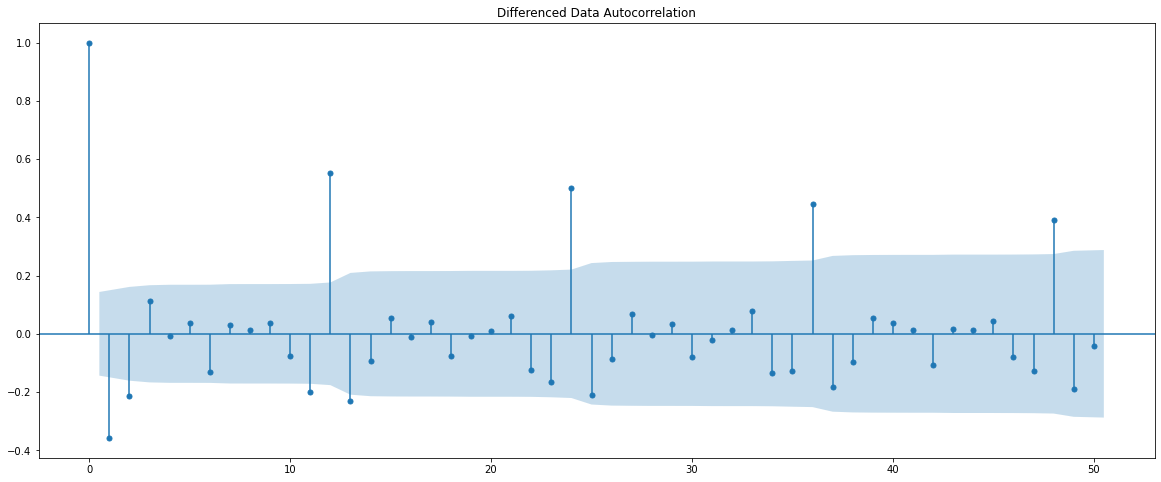

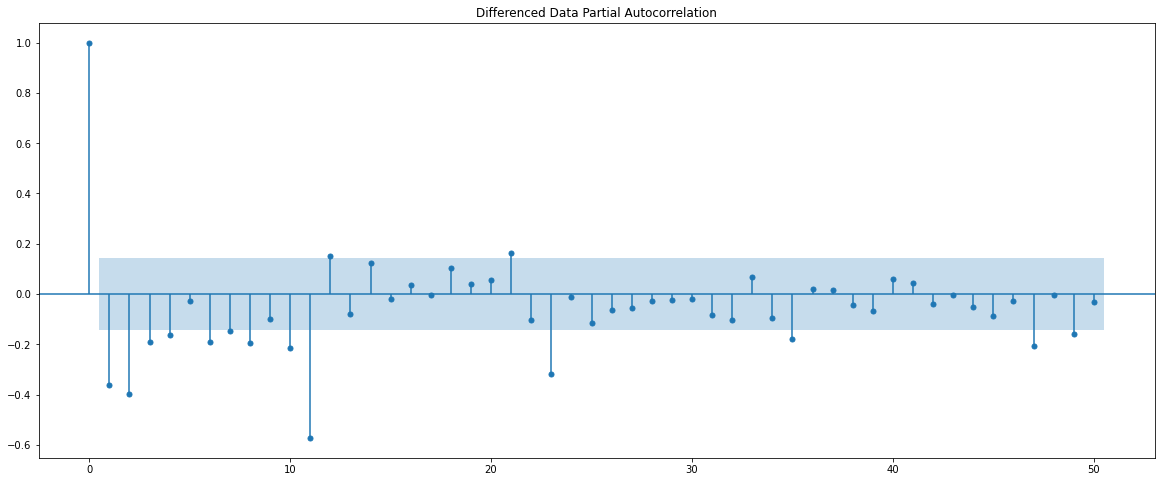

In [313]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0. The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0. By looking at the above plots, we will take the value of p and q to be 0 and 0 respectively.

In [314]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 20 Mar 2022   AIC                           1279.299
Time:                        19:56:40   BIC                           1296.550
Sample:                    02-29-1980   HQIC                          1286.309
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

We get a comparatively simpler model by looking at the ACF and the PACF plots.

### Predict on the Test Set using this model and evaluate the model.

In [315]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [316]:
## Test Data - RMSE 

rmse_model6_test = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print("For MANUAL ARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))

For MANUAL ARIMA on the Test Data,  RMSE is 17.076


In [317]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model6_test]},index=['MANUAL ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
Regression                            16.979414
Naive Model                           78.396083
Simple Average Model                  52.318735
2point Trailing Moving Average        12.298291
4 point Trailing Moving Average       15.845558
6point Trailing Moving Average        15.986163
9 point Trailing Moving Average       16.500823
ARIMA(0,1,2)                          17.279653
SARIMA(1,1,2)(2,0,2,6)                17.279653
SARIMA(0,1,2)(2,0,2,12)               26.417374
MANUAL ARIMA(2,1,2)                   17.075734

### SARIMA MANUAL

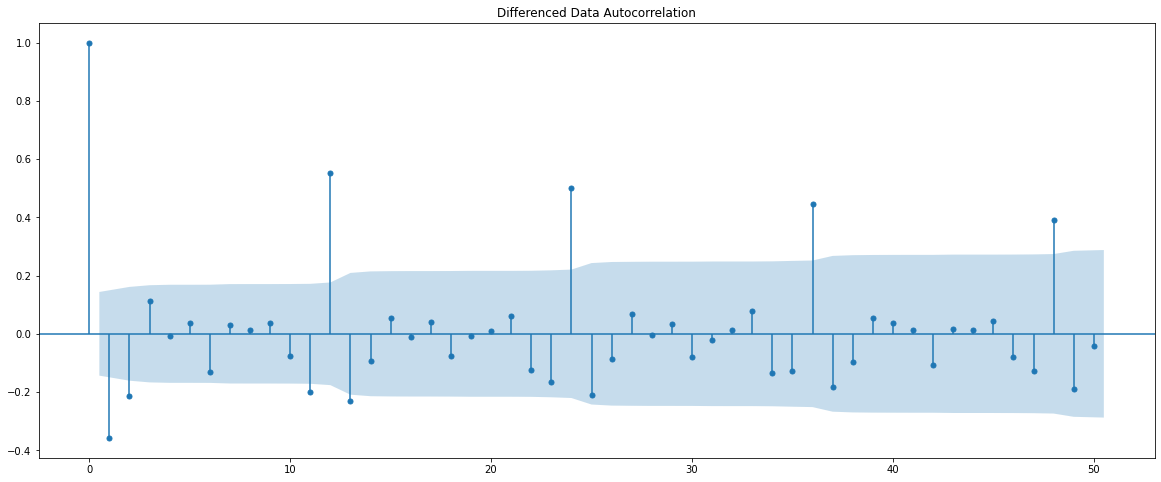

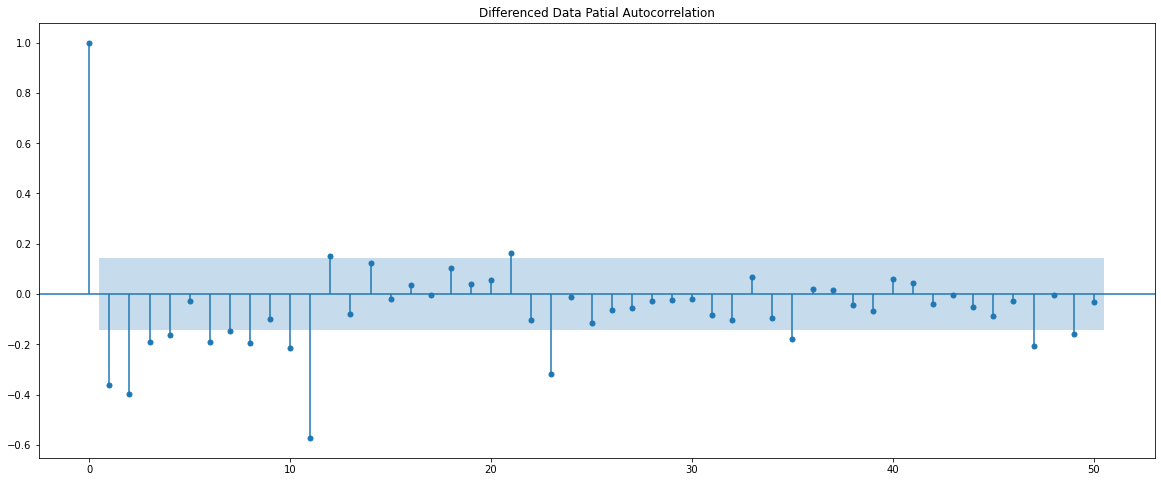

In [318]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

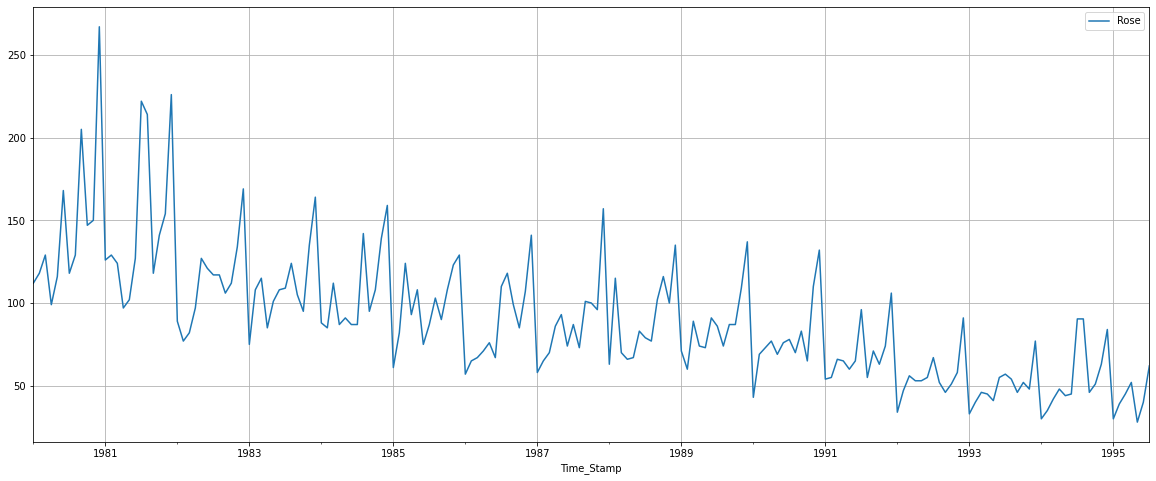

In [319]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

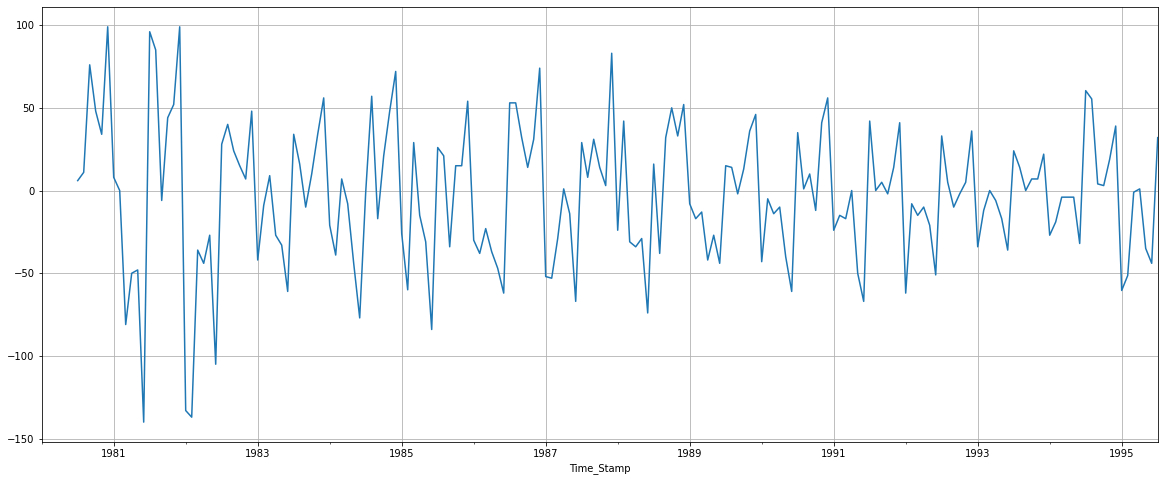

In [320]:
(df['Rose'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

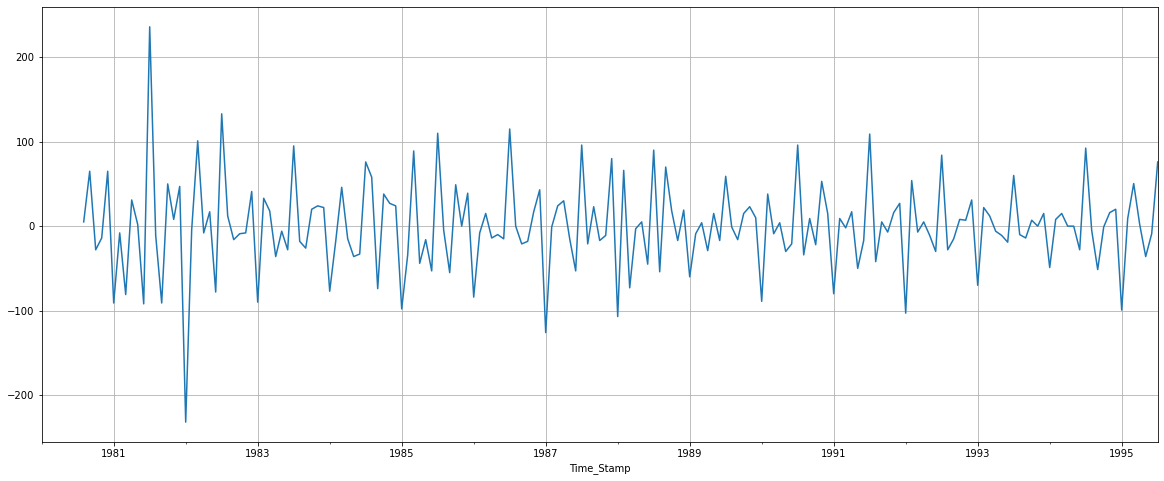

In [321]:
(df['Rose'].diff(6)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model

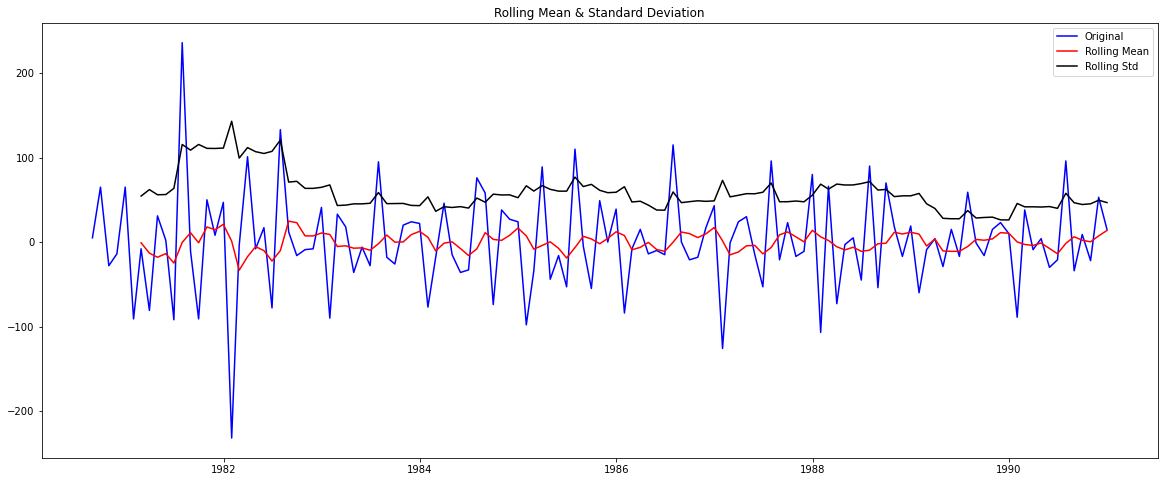

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [322]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

### Checking the ACF and the PACF plots for the new modified Time Series.

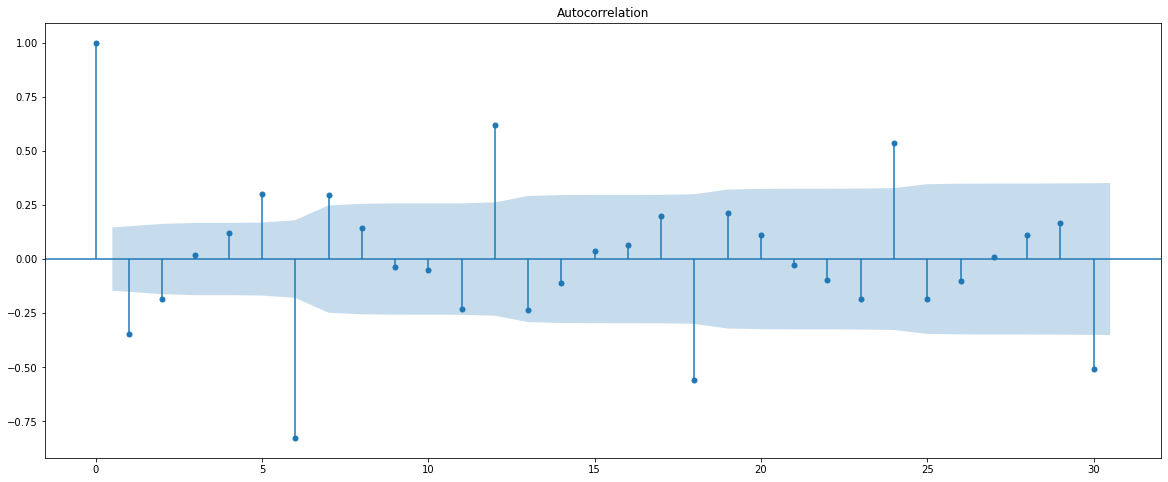

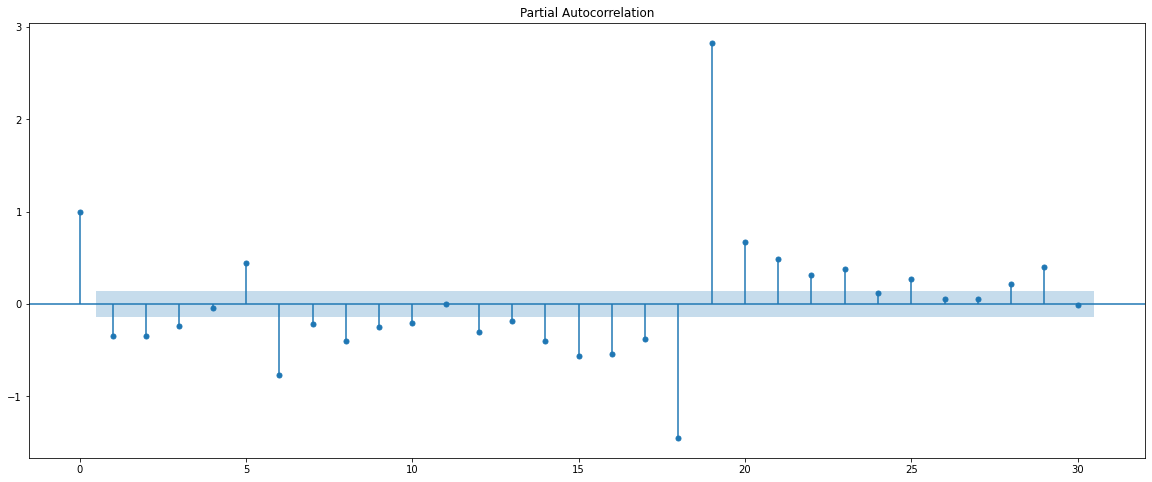

In [323]:
plot_acf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(2) and q(2) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. 

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.



In [324]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -513.610
Date:                           Sun, 20 Mar 2022   AIC                           1045.220
Time:                                   19:56:43   BIC                           1070.003
Sample:                                        0   HQIC                          1055.281
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0477      0.120      8.745      0.000       0.813       1.283
ar.L2         -0.2224      0.134     -1.659

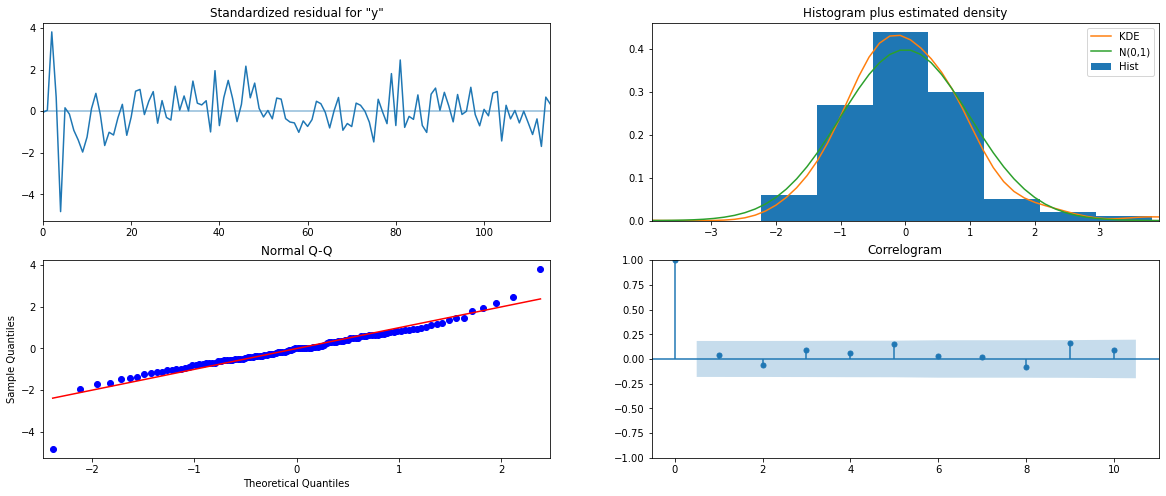

In [325]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [326]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [327]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  76.094739  18.390157      40.050693     112.138785
1  74.402940  18.394706      38.349980     110.455900
2  81.944402  18.588620      45.511376     118.377429
3  76.183082  18.847301      39.243050     113.123113
4  80.878778  19.032168      43.576414     118.181141

In [328]:
## Test Data - RMSE 

rmse_model7_test = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print("For MANUAL SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model7_test))

For MANUAL SARIMA on the Test Data,  RMSE is 29.600


In [329]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model7_test]},index=['MANUAL SARIMA(2,1,2)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
Regression                            16.979414
Naive Model                           78.396083
Simple Average Model                  52.318735
2point Trailing Moving Average        12.298291
4 point Trailing Moving Average       15.845558
6point Trailing Moving Average        15.986163
9 point Trailing Moving Average       16.500823
ARIMA(0,1,2)                          17.279653
SARIMA(1,1,2)(2,0,2,6)                17.279653
SARIMA(0,1,2)(2,0,2,12)               26.417374
MANUAL ARIMA(2,1,2)                   17.075734
MANUAL SARIMA(2,1,2)(2,0,2,6)         29.599792

### SARIMA at 12

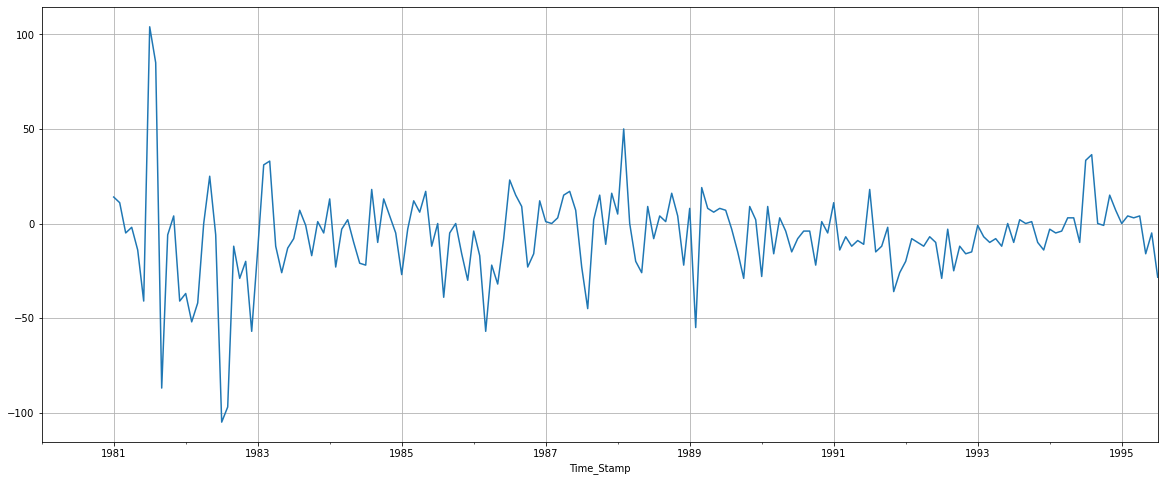

In [330]:
(df['Rose'].diff(12)).plot()
plt.grid();

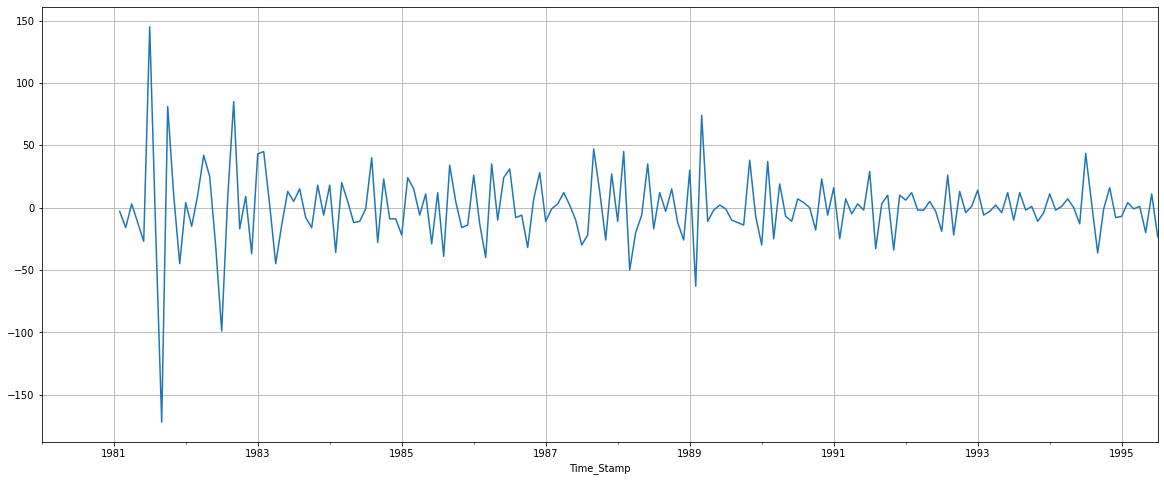

In [331]:
(df['Rose'].diff(12)).diff().plot()
plt.grid();

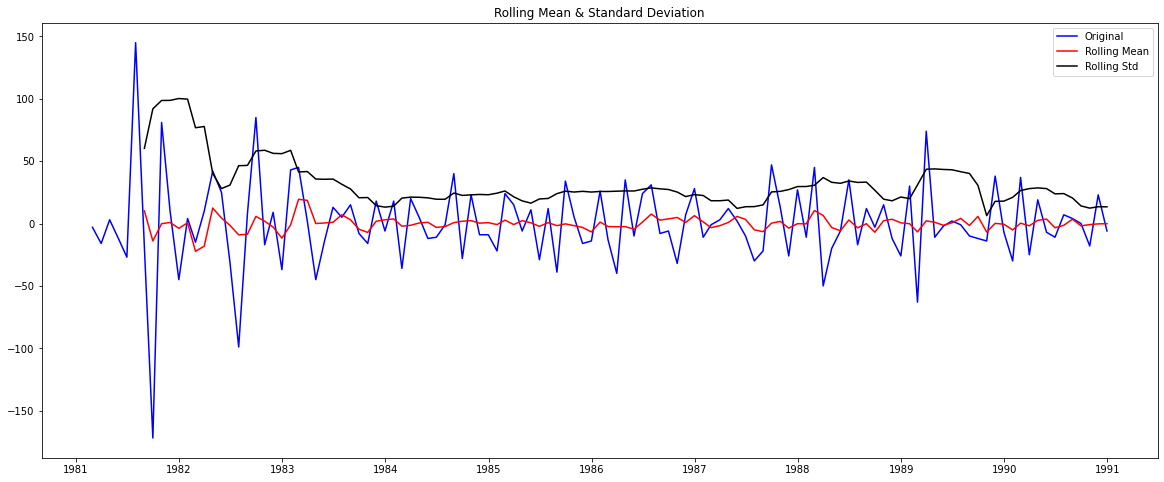

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [332]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

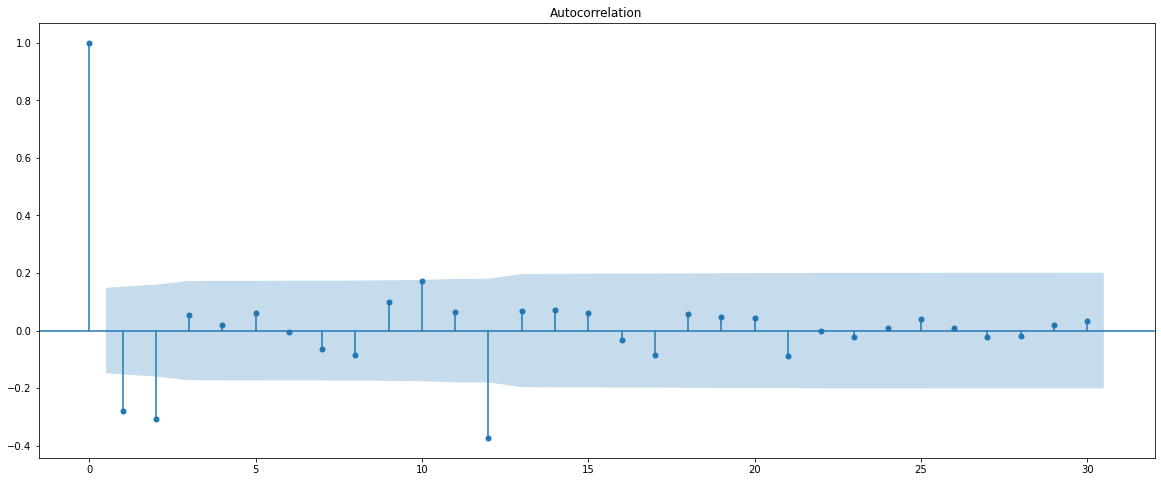

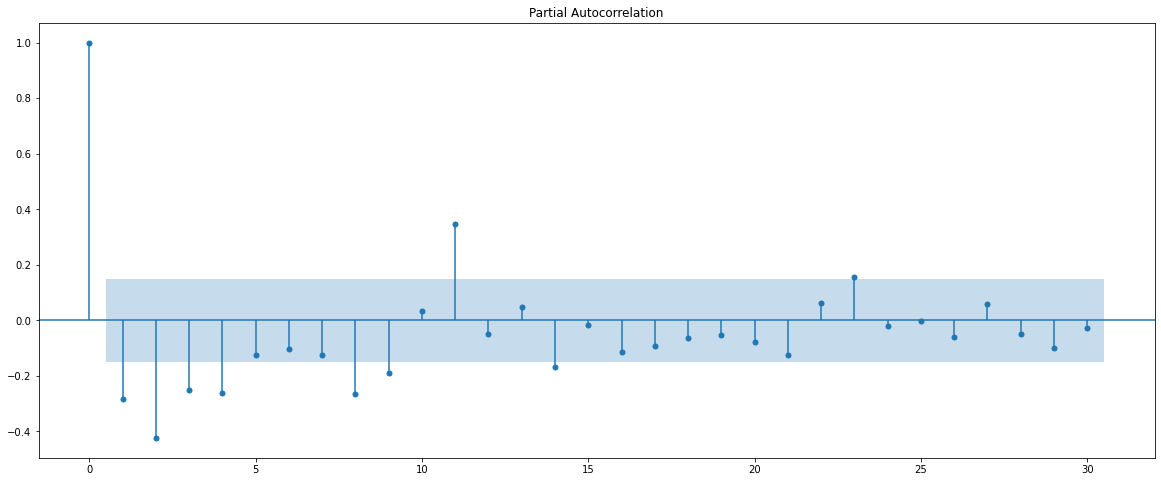

In [333]:
plot_acf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [334]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -513.610
Date:                           Sun, 20 Mar 2022   AIC                           1045.220
Time:                                   19:56:46   BIC                           1070.003
Sample:                                        0   HQIC                          1055.281
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0477      0.120      8.745      0.000       0.813       1.283
ar.L2         -0.2224      0.134     -1.659

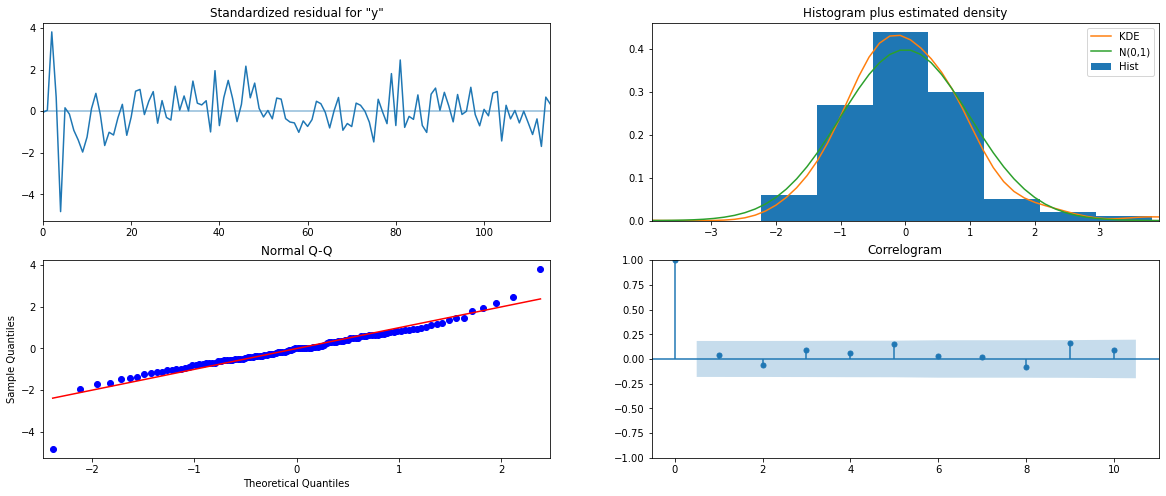

In [335]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [336]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [337]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  76.094739  18.390157      40.050693     112.138785
1  74.402940  18.394706      38.349980     110.455900
2  81.944402  18.588620      45.511376     118.377429
3  76.183082  18.847301      39.243050     113.123113
4  80.878778  19.032168      43.576414     118.181141

In [338]:
## Test Data - RMSE 

rmse_model8_test = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print("For MANUAL SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model8_test))

For MANUAL SARIMA on the Test Data,  RMSE is 29.600


In [339]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model8_test]},index=['MANUAL SARIMA(2,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      35.936198
Alpha= 1.908, Beta= 7.302, DES        16.979631
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
Regression                            16.979414
Naive Model                           78.396083
Simple Average Model                  52.318735
2point Trailing Moving Average        12.298291
4 point Trailing Moving Average       15.845558
6point Trailing Moving Average        15.986163
9 point Trailing Moving Average       16.500823
ARIMA(0,1,2)                          17.279653
SARIMA(1,1,2)(2,0,2,6)                17.279653
SARIMA(0,1,2)(2,0,2,12)               26.417374
MANUAL ARIMA(2,1,2)                   17.075734
MANUAL SARIMA(2,1,2)(2,0,2,6)         29.599792
MANUAL SARIMA(2,1,2)(2,0,2,12)        29.599792

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [340]:
resultsDf.sort_values(by='Test RMSE')

Test RMSE
2point Trailing Moving Average        12.298291
Alpha=0.1, Beta=0.01, Gamma=0.5, TES  15.548490
4 point Trailing Moving Average       15.845558
6point Trailing Moving Average        15.986163
9 point Trailing Moving Average       16.500823
Regression                            16.979414
Alpha= 1.908, Beta= 7.302, DES        16.979631
MANUAL ARIMA(2,1,2)                   17.075734
ARIMA(0,1,2)                          17.279653
SARIMA(1,1,2)(2,0,2,6)                17.279653
SARIMA(0,1,2)(2,0,2,12)               26.417374
MANUAL SARIMA(2,1,2)(2,0,2,6)         29.599792
MANUAL SARIMA(2,1,2)(2,0,2,12)        29.599792
Alpha= 0.07, SES                      35.936198
Simple Average Model                  52.318735
Naive Model                           78.396083

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
Building the most optimum model on the Full Data.
We see that the best model is the 2 Point Trailing Moving average

In [364]:
fullmodel = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1,
                                                                 smoothing_trend=0.01,
                                                                 smoothing_seasonal=0.5)

In [365]:
RMSE_fullmodel = mean_squared_error(df['Rose'],fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 18.970866797540612


In [366]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction = fullmodel.forecast(steps=len(test))

In [367]:
# Getting the predictions for the 12 months
prediction= fullmodel.forecast(steps=12)

In [368]:
prediction

1995-08-31    62.590882
1995-09-30    38.767694
1995-10-31    42.086701
1995-11-30    47.946761
1995-12-31    67.441246
1996-01-31    24.610148
1996-02-29    30.686046
1996-03-31    35.595213
1996-04-30    39.225245
1996-05-31    27.918623
1996-06-30    34.727766
1996-07-31    57.674372
Freq: M, dtype: float64

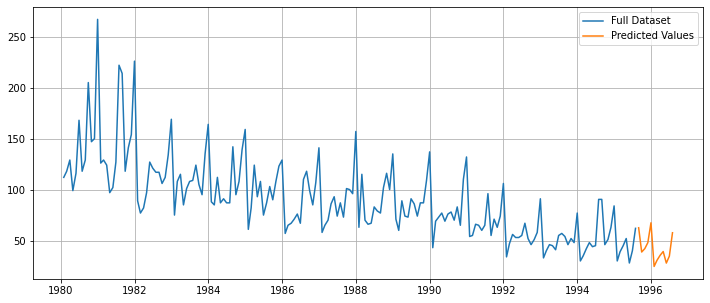

In [369]:
plt.figure(figsize=(12,5))
plt.plot(df['Rose'],label='Full Dataset')
plt.plot(prediction,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

In [359]:

pred_df = pd.DataFrame({'lower_CI':prediction - ((np.percentile(prediction,[2.5,97.5])))[0],
                          'prediction':prediction,
                          'upper_ci': prediction + ((np.percentile(prediction,[2.5,97.5])))[1]})
pred_df.head()

lower_CI  prediction    upper_ci
1995-08-31  37.070903   62.590882  128.698277
1995-09-30  13.247715   38.767694  104.875090
1995-10-31  16.566722   42.086701  108.194097
1995-11-30  22.426782   47.946761  114.054156
1995-12-31  41.921267   67.441246  133.548642

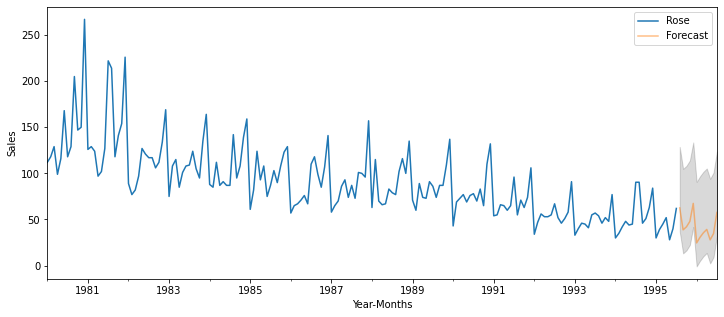

In [360]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(12,5))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

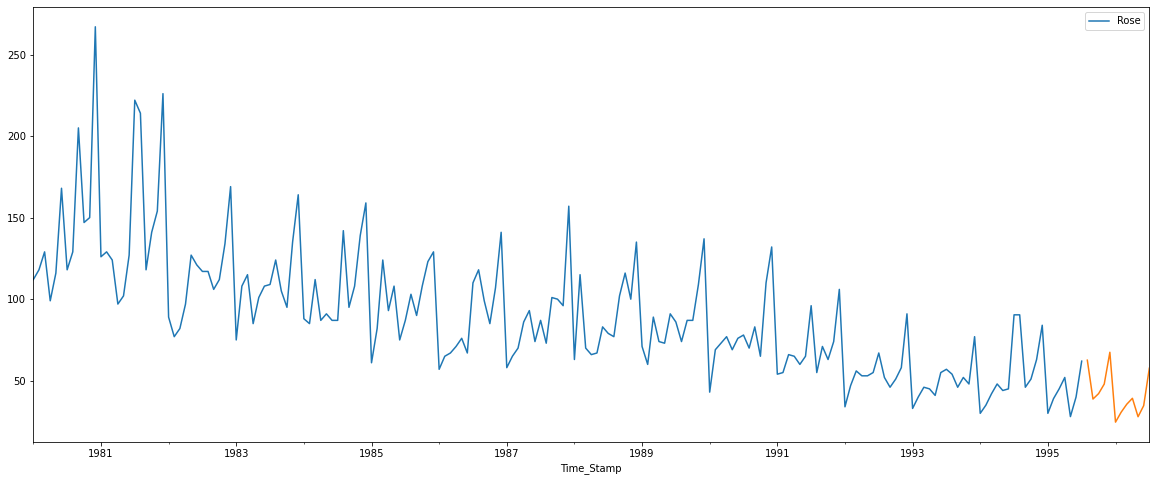

In [361]:
df.plot()
prediction.plot();